In [1]:
import tensorflow as tf
tf.__version__
import keras
keras.__version__

Using TensorFlow backend.


'2.0.9'

In [1]:
import os
import tensorflow as tf
import keras
from keras_contrib.layers.normalization.instancenormalization import InstanceNormalization
#domain [MT2PA,PA2MT]
#version [run_0,run_1,run_2,run_3,run_4]
#component [classifer  dec_sh  dis  enc_ex  enc_sh]
root="/workdir/Data-Guillermo"
models_root=root+"/DADL-MT2PA/models/run_0"


def load_model(domain="MT2PA",version="run_0",component="classifer"):
  os.path.join(root,"DADL-"+domain,"models",version,component+".h5")
  return keras.models.load_model(os.path.join(root,"DADL-"+domain,"models",version,component+".h5"),#compile=False,
                                    custom_objects={'InstanceNormalization':InstanceNormalization})

def load_model_(domain="MT2PA",version="run_0",component="classifer"):
  return os.path.join(root,"DADL-"+domain,"models",version,component+".h5")

Using TensorFlow backend.


In [2]:
model=load_model(domain="MT2PA",version="run_0",component="enc_sh")
model.summary()
model_dec=load_model(domain="MT2PA",version="run_0",component="dec_sh")









__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
enc_sh_input_enc_net (InputLaye (None, 128, 128, 20) 0                                            
__________________________________________________________________________________________________
enc_sh_conv_net_0 (Conv2D)      (None, 128, 128, 16) 15696       enc_sh_input_enc_net[0][0]       
__________________________________________________________________________________________________
enc_sh_isnt_norm_net_0 (Instanc (None, 128, 128, 16) 2           enc_sh_conv_net_0[0][0]          
__________________________________________________________________________________________________
enc_sh_relu_net_0 (Activation)  (None, 128, 128, 16) 0           enc_sh_isnt_norm_net_0[0][0]     
__________________________________________________________________________________________________
en

/usr/local/lib/python3.6/dist-packages/keras/models.py:251: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


TypeError: ('Keyword argument not understood:', 'interpolation')

# DADOS

In [79]:
!ls -lha /workdir/Data-Guillermo/
!ls -lha /workdir/Data-Guillermo/'Mato Grosso'
!ls -lha /workdir/Data-Guillermo/'Para'
!ls -lha /workdir/Data-Guillermo/'maranhao'

total 14M
drwxrwxrwx 1 root root 4.0K Oct 14 17:43  .
drwxrwxrwx 1 root root 4.0K Oct  7 14:46  ..
drwxrwxrwx 1 root root 4.0K Sep 18 20:56  DADL-MT2PA
drwxrwxrwx 1 root root 4.0K Sep 18 20:56  DADL-PA2MA
drwxrwxrwx 1 root root 4.0K Oct 14 17:43 'Mato Grosso'
-rwxrwxrwx 1 root root 3.8M Oct 13 01:00 'Mato Grosso-20241013T005742Z-002.zip'
drwxrwxrwx 1 root root 4.0K Oct 14 17:43  Para
-rwxrwxrwx 1 root root 3.5M Oct 13 02:37  Para-20241013T023426Z-002.zip
drwxrwxrwx 1 root root 4.0K Sep 18 20:57  dataset
drwxrwxrwx 1 root root 4.0K Oct 14 17:43  maranhao
-rwxrwxrwx 1 root root 6.1M Oct 14 16:05  maranhao-20241014T160023Z-002.zip
total 16G
drwxrwxrwx 1 root root 4.0K Oct 14 17:43 .
drwxrwxrwx 1 root root 4.0K Oct 14 17:43 ..
-rwxrwxrwx 1 root root  14G Oct 13 01:36 MT_1C_RGB_img_filt_norm_2020_2021_10B-001.npy
-rwxrwxrwx 1 root root 708M Apr 23  2022 MT_1C_ref_2020_2021.npy
-rwxrwxrwx 1 root root 708M Feb 24  2022 test_mask_MT.npy
total 14G
drwxrwxrwx 1 root root 4.0K Oct 14 17:43 .
drwx

In [1]:
#root="/workdir/Data-Guillermo"
root="/workdir/Data-Guillermo/dataset"
import numpy as np
import os
import glob

In [3]:
root="/workdir/Data-Guillermo"
dataset='maranhao'
glob.glob(os.path.join(root,dataset,'*_1C_RGB_img_filt_norm_2020_2021_10B-001.npy'))[0] 

'/workdir/Data-Guillermo/maranhao/MA_1C_RGB_img_filt_norm_2020_2021_10B-001.npy'

In [5]:
root="/workdir/Data-Guillermo"
dataset='Para'
X_MA = np.load(
    glob.glob(os.path.join(root,dataset,'*_1C_RGB_img_filt_norm_2020_2021_10B-001.npy'))[0] ,
    mmap_mode='r')

ref_MA = np.load(
    glob.glob(os.path.join(root,dataset,'*ref_2020_2021.npy'))[0] ,
    mmap_mode='r')

mask_MA = np.load(
    glob.glob(os.path.join(root,dataset,'test_mask_*.npy'))[0] ,
    mmap_mode='r')

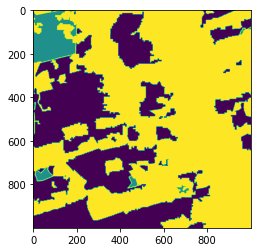

In [6]:
import matplotlib.pyplot as plt
plt.imshow(ref_MA[:1000,:1000])

[0. 1.]


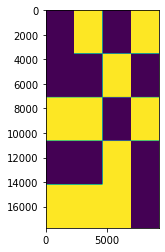

In [71]:
import matplotlib.pyplot as plt
f=18
plt.imshow(mask_MA)
print(np.unique(mask_MA))

In [111]:
from einops import rearrange
from Data_preprocessing import *

In [113]:
get_box_coords(mask_MA,128,dat_set=1)

array([[    0,   128,  2304,  2432],
       [    0,   128,  2432,  2560],
       [    0,   128,  2560,  2688],
       ...,
       [17664, 17792,  6400,  6528],
       [17664, 17792,  6528,  6656],
       [17664, 17792,  6656,  6784]])

# DISTANCE COMPUTATION

## MT PA

In [1]:
import sys
sys.path.append("../Utils")
import numpy as np
import glob
import os
from Data_preprocessing import get_box_coords
from Data_preprocessing import load_model
root="/tf/Data-Guillermo"

Using TensorFlow backend.


## TRAIN

In [2]:
root="/tf/Data-Guillermo"
dataset_1="maranhao" # "maranhao"   # "Mato Grosso" #'Para'
origin="MA"
X_1 = np.load(
    glob.glob(os.path.join(root,dataset_1,'*_1C_RGB_img_filt_norm_2020_2021_10B-001.npy'))[0] ,
    mmap_mode='r')

mask_1 = np.load(
    glob.glob(os.path.join(root,dataset_1,'test_mask_*.npy'))[0] ,
    mmap_mode='r')

X_1,mask_1,data_1=get_box_coords(X_1,mask_1,128,dat_set=1)

#X_2 = np.load(
#    glob.glob(os.path.join(root,dataset_2,'*_1C_RGB_img_filt_norm_2020_2021_10B-001.npy'))[0] ,
#    mmap_mode='r')

#mask_2 = np.load(
#    glob.glob(os.path.join(root,dataset_2,'test_mask_*.npy'))[0] ,
#    mmap_mode='r')

#data_2=get_box_coords(mask_2,128,dat_set=0)

In [3]:
#MT2PA,PA2MA
domain="PA2MA"
version="run_0"
component="enc_sh" # "enc_sh" # "enc_ex"
model=load_model(domain=domain,version=version,component=component,root=root)
model.summary()









__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
enc_sh_input_enc_net (InputLaye (None, 128, 128, 20) 0                                            
__________________________________________________________________________________________________
enc_sh_conv_net_0 (Conv2D)      (None, 128, 128, 16) 15696       enc_sh_input_enc_net[0][0]       
__________________________________________________________________________________________________
enc_sh_isnt_norm_net_0 (Instanc (None, 128, 128, 16) 2           enc_sh_conv_net_0[0][0]          
__________________________________________________________________________________________________
enc_sh_relu_net_0 (Activation)  (None, 128, 128, 16) 0           enc_sh_isnt_norm_net_0[0][0]     
__________________________________________________________________________________________________
en

/usr/local/lib/python3.6/dist-packages/keras/models.py:251: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


## Shared-Private space computation

### MT2PA

In [4]:
import gc

batch_size=12
X_d=X_1
data_d=data_1
#for b in range(int(len(data_1)/5)):
for i in range(0,5):
    version="run_{}".format(str(i))
    
    component="enc_sh"
    model=load_model(domain=domain,version=version,component=component,root=root)
    print(version)
    print(component)
    for b in range(int(len(data_1)/batch_size)):
        batch=data_1[b:b+batch_size]
        x_b=np.array(list(map(lambda c:X_1[c[0]:c[1],c[2]:c[3]],batch)))
        z_sh_b=model.predict(x_b)
        print("creating")
        name="{}_{}_{}_{}_batch_{}.npy".format(origin,component,domain,version,str(b))
        print(name)
        np.save(os.path.join(root,"Latent_space","Validation",name),z_sh_b)
    
    del z_sh_b,x_b
    gc.collect()
    component="enc_ex"
    model=load_model(domain=domain,version=version,component=component,root=root)
    print(version)
    print(component)
    for b in range(int(len(data_1)/batch_size)):
        batch=data_1[b:b+batch_size]
        x_b=np.array(list(map(lambda c:X_1[c[0]:c[1],c[2]:c[3]],batch)))
        z_sh_b=model.predict(x_b)
        print("creating")
        name="{}_{}_{}_{}_batch_{}.npy".format(origin,component,domain,version,str(b))
        print(name)
        np.save(os.path.join(root,"Latent_space","Validation",name),z_sh_b)
    del z_sh_b,x_b
    gc.collect()

run_0
enc_sh
creating
MA_enc_sh_PA2MA_run_0_batch_0.npy
creating
MA_enc_sh_PA2MA_run_0_batch_1.npy
creating
MA_enc_sh_PA2MA_run_0_batch_2.npy
creating
MA_enc_sh_PA2MA_run_0_batch_3.npy
creating
MA_enc_sh_PA2MA_run_0_batch_4.npy
creating
MA_enc_sh_PA2MA_run_0_batch_5.npy
creating
MA_enc_sh_PA2MA_run_0_batch_6.npy
creating
MA_enc_sh_PA2MA_run_0_batch_7.npy
creating
MA_enc_sh_PA2MA_run_0_batch_8.npy
creating
MA_enc_sh_PA2MA_run_0_batch_9.npy
creating
MA_enc_sh_PA2MA_run_0_batch_10.npy
creating
MA_enc_sh_PA2MA_run_0_batch_11.npy
creating
MA_enc_sh_PA2MA_run_0_batch_12.npy
creating
MA_enc_sh_PA2MA_run_0_batch_13.npy
creating
MA_enc_sh_PA2MA_run_0_batch_14.npy
creating
MA_enc_sh_PA2MA_run_0_batch_15.npy
creating
MA_enc_sh_PA2MA_run_0_batch_16.npy
creating
MA_enc_sh_PA2MA_run_0_batch_17.npy
creating
MA_enc_sh_PA2MA_run_0_batch_18.npy
creating
MA_enc_sh_PA2MA_run_0_batch_19.npy
creating
MA_enc_sh_PA2MA_run_0_batch_20.npy
creating
MA_enc_sh_PA2MA_run_0_batch_21.npy
creating
MA_enc_sh_PA2MA_run_

creating
MA_enc_sh_PA2MA_run_0_batch_186.npy
creating
MA_enc_sh_PA2MA_run_0_batch_187.npy
creating
MA_enc_sh_PA2MA_run_0_batch_188.npy
creating
MA_enc_sh_PA2MA_run_0_batch_189.npy
creating
MA_enc_sh_PA2MA_run_0_batch_190.npy
creating
MA_enc_sh_PA2MA_run_0_batch_191.npy
creating
MA_enc_sh_PA2MA_run_0_batch_192.npy
creating
MA_enc_sh_PA2MA_run_0_batch_193.npy
creating
MA_enc_sh_PA2MA_run_0_batch_194.npy
creating
MA_enc_sh_PA2MA_run_0_batch_195.npy
creating
MA_enc_sh_PA2MA_run_0_batch_196.npy
creating
MA_enc_sh_PA2MA_run_0_batch_197.npy
creating
MA_enc_sh_PA2MA_run_0_batch_198.npy
creating
MA_enc_sh_PA2MA_run_0_batch_199.npy
creating
MA_enc_sh_PA2MA_run_0_batch_200.npy
creating
MA_enc_sh_PA2MA_run_0_batch_201.npy
creating
MA_enc_sh_PA2MA_run_0_batch_202.npy
creating
MA_enc_sh_PA2MA_run_0_batch_203.npy
creating
MA_enc_sh_PA2MA_run_0_batch_204.npy
creating
MA_enc_sh_PA2MA_run_0_batch_205.npy
creating
MA_enc_sh_PA2MA_run_0_batch_206.npy
creating
MA_enc_sh_PA2MA_run_0_batch_207.npy
creating
M

creating
MA_enc_sh_PA2MA_run_0_batch_369.npy
creating
MA_enc_sh_PA2MA_run_0_batch_370.npy
creating
MA_enc_sh_PA2MA_run_0_batch_371.npy
creating
MA_enc_sh_PA2MA_run_0_batch_372.npy
creating
MA_enc_sh_PA2MA_run_0_batch_373.npy
creating
MA_enc_sh_PA2MA_run_0_batch_374.npy
creating
MA_enc_sh_PA2MA_run_0_batch_375.npy
creating
MA_enc_sh_PA2MA_run_0_batch_376.npy
creating
MA_enc_sh_PA2MA_run_0_batch_377.npy
creating
MA_enc_sh_PA2MA_run_0_batch_378.npy
creating
MA_enc_sh_PA2MA_run_0_batch_379.npy
creating
MA_enc_sh_PA2MA_run_0_batch_380.npy
creating
MA_enc_sh_PA2MA_run_0_batch_381.npy
creating
MA_enc_sh_PA2MA_run_0_batch_382.npy
creating
MA_enc_sh_PA2MA_run_0_batch_383.npy
creating
MA_enc_sh_PA2MA_run_0_batch_384.npy
creating
MA_enc_sh_PA2MA_run_0_batch_385.npy
creating
MA_enc_sh_PA2MA_run_0_batch_386.npy
creating
MA_enc_sh_PA2MA_run_0_batch_387.npy
creating
MA_enc_sh_PA2MA_run_0_batch_388.npy
creating
MA_enc_sh_PA2MA_run_0_batch_389.npy
creating
MA_enc_sh_PA2MA_run_0_batch_390.npy
creating
M

creating
MA_enc_ex_PA2MA_run_0_batch_74.npy
creating
MA_enc_ex_PA2MA_run_0_batch_75.npy
creating
MA_enc_ex_PA2MA_run_0_batch_76.npy
creating
MA_enc_ex_PA2MA_run_0_batch_77.npy
creating
MA_enc_ex_PA2MA_run_0_batch_78.npy
creating
MA_enc_ex_PA2MA_run_0_batch_79.npy
creating
MA_enc_ex_PA2MA_run_0_batch_80.npy
creating
MA_enc_ex_PA2MA_run_0_batch_81.npy
creating
MA_enc_ex_PA2MA_run_0_batch_82.npy
creating
MA_enc_ex_PA2MA_run_0_batch_83.npy
creating
MA_enc_ex_PA2MA_run_0_batch_84.npy
creating
MA_enc_ex_PA2MA_run_0_batch_85.npy
creating
MA_enc_ex_PA2MA_run_0_batch_86.npy
creating
MA_enc_ex_PA2MA_run_0_batch_87.npy
creating
MA_enc_ex_PA2MA_run_0_batch_88.npy
creating
MA_enc_ex_PA2MA_run_0_batch_89.npy
creating
MA_enc_ex_PA2MA_run_0_batch_90.npy
creating
MA_enc_ex_PA2MA_run_0_batch_91.npy
creating
MA_enc_ex_PA2MA_run_0_batch_92.npy
creating
MA_enc_ex_PA2MA_run_0_batch_93.npy
creating
MA_enc_ex_PA2MA_run_0_batch_94.npy
creating
MA_enc_ex_PA2MA_run_0_batch_95.npy
creating
MA_enc_ex_PA2MA_run_0_b

creating
MA_enc_ex_PA2MA_run_0_batch_258.npy
creating
MA_enc_ex_PA2MA_run_0_batch_259.npy
creating
MA_enc_ex_PA2MA_run_0_batch_260.npy
creating
MA_enc_ex_PA2MA_run_0_batch_261.npy
creating
MA_enc_ex_PA2MA_run_0_batch_262.npy
creating
MA_enc_ex_PA2MA_run_0_batch_263.npy
creating
MA_enc_ex_PA2MA_run_0_batch_264.npy
creating
MA_enc_ex_PA2MA_run_0_batch_265.npy
creating
MA_enc_ex_PA2MA_run_0_batch_266.npy
creating
MA_enc_ex_PA2MA_run_0_batch_267.npy
creating
MA_enc_ex_PA2MA_run_0_batch_268.npy
creating
MA_enc_ex_PA2MA_run_0_batch_269.npy
creating
MA_enc_ex_PA2MA_run_0_batch_270.npy
creating
MA_enc_ex_PA2MA_run_0_batch_271.npy
creating
MA_enc_ex_PA2MA_run_0_batch_272.npy
creating
MA_enc_ex_PA2MA_run_0_batch_273.npy
creating
MA_enc_ex_PA2MA_run_0_batch_274.npy
creating
MA_enc_ex_PA2MA_run_0_batch_275.npy
creating
MA_enc_ex_PA2MA_run_0_batch_276.npy
creating
MA_enc_ex_PA2MA_run_0_batch_277.npy
creating
MA_enc_ex_PA2MA_run_0_batch_278.npy
creating
MA_enc_ex_PA2MA_run_0_batch_279.npy
creating
M

creating
MA_enc_ex_PA2MA_run_0_batch_442.npy
creating
MA_enc_ex_PA2MA_run_0_batch_443.npy
creating
MA_enc_ex_PA2MA_run_0_batch_444.npy
creating
MA_enc_ex_PA2MA_run_0_batch_445.npy
creating
MA_enc_ex_PA2MA_run_0_batch_446.npy
creating
MA_enc_ex_PA2MA_run_0_batch_447.npy
creating
MA_enc_ex_PA2MA_run_0_batch_448.npy
creating
MA_enc_ex_PA2MA_run_0_batch_449.npy
creating
MA_enc_ex_PA2MA_run_0_batch_450.npy
creating
MA_enc_ex_PA2MA_run_0_batch_451.npy
creating
MA_enc_ex_PA2MA_run_0_batch_452.npy
creating
MA_enc_ex_PA2MA_run_0_batch_453.npy
creating
MA_enc_ex_PA2MA_run_0_batch_454.npy
creating
MA_enc_ex_PA2MA_run_0_batch_455.npy
creating
MA_enc_ex_PA2MA_run_0_batch_456.npy
creating
MA_enc_ex_PA2MA_run_0_batch_457.npy
creating
MA_enc_ex_PA2MA_run_0_batch_458.npy
creating
MA_enc_ex_PA2MA_run_0_batch_459.npy
creating
MA_enc_ex_PA2MA_run_0_batch_460.npy
creating
MA_enc_ex_PA2MA_run_0_batch_461.npy
creating
MA_enc_ex_PA2MA_run_0_batch_462.npy
creating
MA_enc_ex_PA2MA_run_0_batch_463.npy
creating
M

creating
MA_enc_sh_PA2MA_run_1_batch_148.npy
creating
MA_enc_sh_PA2MA_run_1_batch_149.npy
creating
MA_enc_sh_PA2MA_run_1_batch_150.npy
creating
MA_enc_sh_PA2MA_run_1_batch_151.npy
creating
MA_enc_sh_PA2MA_run_1_batch_152.npy
creating
MA_enc_sh_PA2MA_run_1_batch_153.npy
creating
MA_enc_sh_PA2MA_run_1_batch_154.npy
creating
MA_enc_sh_PA2MA_run_1_batch_155.npy
creating
MA_enc_sh_PA2MA_run_1_batch_156.npy
creating
MA_enc_sh_PA2MA_run_1_batch_157.npy
creating
MA_enc_sh_PA2MA_run_1_batch_158.npy
creating
MA_enc_sh_PA2MA_run_1_batch_159.npy
creating
MA_enc_sh_PA2MA_run_1_batch_160.npy
creating
MA_enc_sh_PA2MA_run_1_batch_161.npy
creating
MA_enc_sh_PA2MA_run_1_batch_162.npy
creating
MA_enc_sh_PA2MA_run_1_batch_163.npy
creating
MA_enc_sh_PA2MA_run_1_batch_164.npy
creating
MA_enc_sh_PA2MA_run_1_batch_165.npy
creating
MA_enc_sh_PA2MA_run_1_batch_166.npy
creating
MA_enc_sh_PA2MA_run_1_batch_167.npy
creating
MA_enc_sh_PA2MA_run_1_batch_168.npy
creating
MA_enc_sh_PA2MA_run_1_batch_169.npy
creating
M

creating
MA_enc_sh_PA2MA_run_1_batch_332.npy
creating
MA_enc_sh_PA2MA_run_1_batch_333.npy
creating
MA_enc_sh_PA2MA_run_1_batch_334.npy
creating
MA_enc_sh_PA2MA_run_1_batch_335.npy
creating
MA_enc_sh_PA2MA_run_1_batch_336.npy
creating
MA_enc_sh_PA2MA_run_1_batch_337.npy
creating
MA_enc_sh_PA2MA_run_1_batch_338.npy
creating
MA_enc_sh_PA2MA_run_1_batch_339.npy
creating
MA_enc_sh_PA2MA_run_1_batch_340.npy
creating
MA_enc_sh_PA2MA_run_1_batch_341.npy
creating
MA_enc_sh_PA2MA_run_1_batch_342.npy
creating
MA_enc_sh_PA2MA_run_1_batch_343.npy
creating
MA_enc_sh_PA2MA_run_1_batch_344.npy
creating
MA_enc_sh_PA2MA_run_1_batch_345.npy
creating
MA_enc_sh_PA2MA_run_1_batch_346.npy
creating
MA_enc_sh_PA2MA_run_1_batch_347.npy
creating
MA_enc_sh_PA2MA_run_1_batch_348.npy
creating
MA_enc_sh_PA2MA_run_1_batch_349.npy
creating
MA_enc_sh_PA2MA_run_1_batch_350.npy
creating
MA_enc_sh_PA2MA_run_1_batch_351.npy
creating
MA_enc_sh_PA2MA_run_1_batch_352.npy
creating
MA_enc_sh_PA2MA_run_1_batch_353.npy
creating
M

creating
MA_enc_ex_PA2MA_run_1_batch_36.npy
creating
MA_enc_ex_PA2MA_run_1_batch_37.npy
creating
MA_enc_ex_PA2MA_run_1_batch_38.npy
creating
MA_enc_ex_PA2MA_run_1_batch_39.npy
creating
MA_enc_ex_PA2MA_run_1_batch_40.npy
creating
MA_enc_ex_PA2MA_run_1_batch_41.npy
creating
MA_enc_ex_PA2MA_run_1_batch_42.npy
creating
MA_enc_ex_PA2MA_run_1_batch_43.npy
creating
MA_enc_ex_PA2MA_run_1_batch_44.npy
creating
MA_enc_ex_PA2MA_run_1_batch_45.npy
creating
MA_enc_ex_PA2MA_run_1_batch_46.npy
creating
MA_enc_ex_PA2MA_run_1_batch_47.npy
creating
MA_enc_ex_PA2MA_run_1_batch_48.npy
creating
MA_enc_ex_PA2MA_run_1_batch_49.npy
creating
MA_enc_ex_PA2MA_run_1_batch_50.npy
creating
MA_enc_ex_PA2MA_run_1_batch_51.npy
creating
MA_enc_ex_PA2MA_run_1_batch_52.npy
creating
MA_enc_ex_PA2MA_run_1_batch_53.npy
creating
MA_enc_ex_PA2MA_run_1_batch_54.npy
creating
MA_enc_ex_PA2MA_run_1_batch_55.npy
creating
MA_enc_ex_PA2MA_run_1_batch_56.npy
creating
MA_enc_ex_PA2MA_run_1_batch_57.npy
creating
MA_enc_ex_PA2MA_run_1_b

creating
MA_enc_ex_PA2MA_run_1_batch_221.npy
creating
MA_enc_ex_PA2MA_run_1_batch_222.npy
creating
MA_enc_ex_PA2MA_run_1_batch_223.npy
creating
MA_enc_ex_PA2MA_run_1_batch_224.npy
creating
MA_enc_ex_PA2MA_run_1_batch_225.npy
creating
MA_enc_ex_PA2MA_run_1_batch_226.npy
creating
MA_enc_ex_PA2MA_run_1_batch_227.npy
creating
MA_enc_ex_PA2MA_run_1_batch_228.npy
creating
MA_enc_ex_PA2MA_run_1_batch_229.npy
creating
MA_enc_ex_PA2MA_run_1_batch_230.npy
creating
MA_enc_ex_PA2MA_run_1_batch_231.npy
creating
MA_enc_ex_PA2MA_run_1_batch_232.npy
creating
MA_enc_ex_PA2MA_run_1_batch_233.npy
creating
MA_enc_ex_PA2MA_run_1_batch_234.npy
creating
MA_enc_ex_PA2MA_run_1_batch_235.npy
creating
MA_enc_ex_PA2MA_run_1_batch_236.npy
creating
MA_enc_ex_PA2MA_run_1_batch_237.npy
creating
MA_enc_ex_PA2MA_run_1_batch_238.npy
creating
MA_enc_ex_PA2MA_run_1_batch_239.npy
creating
MA_enc_ex_PA2MA_run_1_batch_240.npy
creating
MA_enc_ex_PA2MA_run_1_batch_241.npy
creating
MA_enc_ex_PA2MA_run_1_batch_242.npy
creating
M

creating
MA_enc_ex_PA2MA_run_1_batch_405.npy
creating
MA_enc_ex_PA2MA_run_1_batch_406.npy
creating
MA_enc_ex_PA2MA_run_1_batch_407.npy
creating
MA_enc_ex_PA2MA_run_1_batch_408.npy
creating
MA_enc_ex_PA2MA_run_1_batch_409.npy
creating
MA_enc_ex_PA2MA_run_1_batch_410.npy
creating
MA_enc_ex_PA2MA_run_1_batch_411.npy
creating
MA_enc_ex_PA2MA_run_1_batch_412.npy
creating
MA_enc_ex_PA2MA_run_1_batch_413.npy
creating
MA_enc_ex_PA2MA_run_1_batch_414.npy
creating
MA_enc_ex_PA2MA_run_1_batch_415.npy
creating
MA_enc_ex_PA2MA_run_1_batch_416.npy
creating
MA_enc_ex_PA2MA_run_1_batch_417.npy
creating
MA_enc_ex_PA2MA_run_1_batch_418.npy
creating
MA_enc_ex_PA2MA_run_1_batch_419.npy
creating
MA_enc_ex_PA2MA_run_1_batch_420.npy
creating
MA_enc_ex_PA2MA_run_1_batch_421.npy
creating
MA_enc_ex_PA2MA_run_1_batch_422.npy
creating
MA_enc_ex_PA2MA_run_1_batch_423.npy
creating
MA_enc_ex_PA2MA_run_1_batch_424.npy
creating
MA_enc_ex_PA2MA_run_1_batch_425.npy
creating
MA_enc_ex_PA2MA_run_1_batch_426.npy
creating
M

creating
MA_enc_sh_PA2MA_run_2_batch_112.npy
creating
MA_enc_sh_PA2MA_run_2_batch_113.npy
creating
MA_enc_sh_PA2MA_run_2_batch_114.npy
creating
MA_enc_sh_PA2MA_run_2_batch_115.npy
creating
MA_enc_sh_PA2MA_run_2_batch_116.npy
creating
MA_enc_sh_PA2MA_run_2_batch_117.npy
creating
MA_enc_sh_PA2MA_run_2_batch_118.npy
creating
MA_enc_sh_PA2MA_run_2_batch_119.npy
creating
MA_enc_sh_PA2MA_run_2_batch_120.npy
creating
MA_enc_sh_PA2MA_run_2_batch_121.npy
creating
MA_enc_sh_PA2MA_run_2_batch_122.npy
creating
MA_enc_sh_PA2MA_run_2_batch_123.npy
creating
MA_enc_sh_PA2MA_run_2_batch_124.npy
creating
MA_enc_sh_PA2MA_run_2_batch_125.npy
creating
MA_enc_sh_PA2MA_run_2_batch_126.npy
creating
MA_enc_sh_PA2MA_run_2_batch_127.npy
creating
MA_enc_sh_PA2MA_run_2_batch_128.npy
creating
MA_enc_sh_PA2MA_run_2_batch_129.npy
creating
MA_enc_sh_PA2MA_run_2_batch_130.npy
creating
MA_enc_sh_PA2MA_run_2_batch_131.npy
creating
MA_enc_sh_PA2MA_run_2_batch_132.npy
creating
MA_enc_sh_PA2MA_run_2_batch_133.npy
creating
M

creating
MA_enc_sh_PA2MA_run_2_batch_296.npy
creating
MA_enc_sh_PA2MA_run_2_batch_297.npy
creating
MA_enc_sh_PA2MA_run_2_batch_298.npy
creating
MA_enc_sh_PA2MA_run_2_batch_299.npy
creating
MA_enc_sh_PA2MA_run_2_batch_300.npy
creating
MA_enc_sh_PA2MA_run_2_batch_301.npy
creating
MA_enc_sh_PA2MA_run_2_batch_302.npy
creating
MA_enc_sh_PA2MA_run_2_batch_303.npy
creating
MA_enc_sh_PA2MA_run_2_batch_304.npy
creating
MA_enc_sh_PA2MA_run_2_batch_305.npy
creating
MA_enc_sh_PA2MA_run_2_batch_306.npy
creating
MA_enc_sh_PA2MA_run_2_batch_307.npy
creating
MA_enc_sh_PA2MA_run_2_batch_308.npy
creating
MA_enc_sh_PA2MA_run_2_batch_309.npy
creating
MA_enc_sh_PA2MA_run_2_batch_310.npy
creating
MA_enc_sh_PA2MA_run_2_batch_311.npy
creating
MA_enc_sh_PA2MA_run_2_batch_312.npy
creating
MA_enc_sh_PA2MA_run_2_batch_313.npy
creating
MA_enc_sh_PA2MA_run_2_batch_314.npy
creating
MA_enc_sh_PA2MA_run_2_batch_315.npy
creating
MA_enc_sh_PA2MA_run_2_batch_316.npy
creating
MA_enc_sh_PA2MA_run_2_batch_317.npy
creating
M

run_2
enc_ex
creating
MA_enc_ex_PA2MA_run_2_batch_0.npy
creating
MA_enc_ex_PA2MA_run_2_batch_1.npy
creating
MA_enc_ex_PA2MA_run_2_batch_2.npy
creating
MA_enc_ex_PA2MA_run_2_batch_3.npy
creating
MA_enc_ex_PA2MA_run_2_batch_4.npy
creating
MA_enc_ex_PA2MA_run_2_batch_5.npy
creating
MA_enc_ex_PA2MA_run_2_batch_6.npy
creating
MA_enc_ex_PA2MA_run_2_batch_7.npy
creating
MA_enc_ex_PA2MA_run_2_batch_8.npy
creating
MA_enc_ex_PA2MA_run_2_batch_9.npy
creating
MA_enc_ex_PA2MA_run_2_batch_10.npy
creating
MA_enc_ex_PA2MA_run_2_batch_11.npy
creating
MA_enc_ex_PA2MA_run_2_batch_12.npy
creating
MA_enc_ex_PA2MA_run_2_batch_13.npy
creating
MA_enc_ex_PA2MA_run_2_batch_14.npy
creating
MA_enc_ex_PA2MA_run_2_batch_15.npy
creating
MA_enc_ex_PA2MA_run_2_batch_16.npy
creating
MA_enc_ex_PA2MA_run_2_batch_17.npy
creating
MA_enc_ex_PA2MA_run_2_batch_18.npy
creating
MA_enc_ex_PA2MA_run_2_batch_19.npy
creating
MA_enc_ex_PA2MA_run_2_batch_20.npy
creating
MA_enc_ex_PA2MA_run_2_batch_21.npy
creating
MA_enc_ex_PA2MA_run_

creating
MA_enc_ex_PA2MA_run_2_batch_186.npy
creating
MA_enc_ex_PA2MA_run_2_batch_187.npy
creating
MA_enc_ex_PA2MA_run_2_batch_188.npy
creating
MA_enc_ex_PA2MA_run_2_batch_189.npy
creating
MA_enc_ex_PA2MA_run_2_batch_190.npy
creating
MA_enc_ex_PA2MA_run_2_batch_191.npy
creating
MA_enc_ex_PA2MA_run_2_batch_192.npy
creating
MA_enc_ex_PA2MA_run_2_batch_193.npy
creating
MA_enc_ex_PA2MA_run_2_batch_194.npy
creating
MA_enc_ex_PA2MA_run_2_batch_195.npy
creating
MA_enc_ex_PA2MA_run_2_batch_196.npy
creating
MA_enc_ex_PA2MA_run_2_batch_197.npy
creating
MA_enc_ex_PA2MA_run_2_batch_198.npy
creating
MA_enc_ex_PA2MA_run_2_batch_199.npy
creating
MA_enc_ex_PA2MA_run_2_batch_200.npy
creating
MA_enc_ex_PA2MA_run_2_batch_201.npy
creating
MA_enc_ex_PA2MA_run_2_batch_202.npy
creating
MA_enc_ex_PA2MA_run_2_batch_203.npy
creating
MA_enc_ex_PA2MA_run_2_batch_204.npy
creating
MA_enc_ex_PA2MA_run_2_batch_205.npy
creating
MA_enc_ex_PA2MA_run_2_batch_206.npy
creating
MA_enc_ex_PA2MA_run_2_batch_207.npy
creating
M

creating
MA_enc_ex_PA2MA_run_2_batch_370.npy
creating
MA_enc_ex_PA2MA_run_2_batch_371.npy
creating
MA_enc_ex_PA2MA_run_2_batch_372.npy
creating
MA_enc_ex_PA2MA_run_2_batch_373.npy
creating
MA_enc_ex_PA2MA_run_2_batch_374.npy
creating
MA_enc_ex_PA2MA_run_2_batch_375.npy
creating
MA_enc_ex_PA2MA_run_2_batch_376.npy
creating
MA_enc_ex_PA2MA_run_2_batch_377.npy
creating
MA_enc_ex_PA2MA_run_2_batch_378.npy
creating
MA_enc_ex_PA2MA_run_2_batch_379.npy
creating
MA_enc_ex_PA2MA_run_2_batch_380.npy
creating
MA_enc_ex_PA2MA_run_2_batch_381.npy
creating
MA_enc_ex_PA2MA_run_2_batch_382.npy
creating
MA_enc_ex_PA2MA_run_2_batch_383.npy
creating
MA_enc_ex_PA2MA_run_2_batch_384.npy
creating
MA_enc_ex_PA2MA_run_2_batch_385.npy
creating
MA_enc_ex_PA2MA_run_2_batch_386.npy
creating
MA_enc_ex_PA2MA_run_2_batch_387.npy
creating
MA_enc_ex_PA2MA_run_2_batch_388.npy
creating
MA_enc_ex_PA2MA_run_2_batch_389.npy
creating
MA_enc_ex_PA2MA_run_2_batch_390.npy
creating
MA_enc_ex_PA2MA_run_2_batch_391.npy
creating
M

creating
MA_enc_sh_PA2MA_run_3_batch_76.npy
creating
MA_enc_sh_PA2MA_run_3_batch_77.npy
creating
MA_enc_sh_PA2MA_run_3_batch_78.npy
creating
MA_enc_sh_PA2MA_run_3_batch_79.npy
creating
MA_enc_sh_PA2MA_run_3_batch_80.npy
creating
MA_enc_sh_PA2MA_run_3_batch_81.npy
creating
MA_enc_sh_PA2MA_run_3_batch_82.npy
creating
MA_enc_sh_PA2MA_run_3_batch_83.npy
creating
MA_enc_sh_PA2MA_run_3_batch_84.npy
creating
MA_enc_sh_PA2MA_run_3_batch_85.npy
creating
MA_enc_sh_PA2MA_run_3_batch_86.npy
creating
MA_enc_sh_PA2MA_run_3_batch_87.npy
creating
MA_enc_sh_PA2MA_run_3_batch_88.npy
creating
MA_enc_sh_PA2MA_run_3_batch_89.npy
creating
MA_enc_sh_PA2MA_run_3_batch_90.npy
creating
MA_enc_sh_PA2MA_run_3_batch_91.npy
creating
MA_enc_sh_PA2MA_run_3_batch_92.npy
creating
MA_enc_sh_PA2MA_run_3_batch_93.npy
creating
MA_enc_sh_PA2MA_run_3_batch_94.npy
creating
MA_enc_sh_PA2MA_run_3_batch_95.npy
creating
MA_enc_sh_PA2MA_run_3_batch_96.npy
creating
MA_enc_sh_PA2MA_run_3_batch_97.npy
creating
MA_enc_sh_PA2MA_run_3_b

creating
MA_enc_sh_PA2MA_run_3_batch_260.npy
creating
MA_enc_sh_PA2MA_run_3_batch_261.npy
creating
MA_enc_sh_PA2MA_run_3_batch_262.npy
creating
MA_enc_sh_PA2MA_run_3_batch_263.npy
creating
MA_enc_sh_PA2MA_run_3_batch_264.npy
creating
MA_enc_sh_PA2MA_run_3_batch_265.npy
creating
MA_enc_sh_PA2MA_run_3_batch_266.npy
creating
MA_enc_sh_PA2MA_run_3_batch_267.npy
creating
MA_enc_sh_PA2MA_run_3_batch_268.npy
creating
MA_enc_sh_PA2MA_run_3_batch_269.npy
creating
MA_enc_sh_PA2MA_run_3_batch_270.npy
creating
MA_enc_sh_PA2MA_run_3_batch_271.npy
creating
MA_enc_sh_PA2MA_run_3_batch_272.npy
creating
MA_enc_sh_PA2MA_run_3_batch_273.npy
creating
MA_enc_sh_PA2MA_run_3_batch_274.npy
creating
MA_enc_sh_PA2MA_run_3_batch_275.npy
creating
MA_enc_sh_PA2MA_run_3_batch_276.npy
creating
MA_enc_sh_PA2MA_run_3_batch_277.npy
creating
MA_enc_sh_PA2MA_run_3_batch_278.npy
creating
MA_enc_sh_PA2MA_run_3_batch_279.npy
creating
MA_enc_sh_PA2MA_run_3_batch_280.npy
creating
MA_enc_sh_PA2MA_run_3_batch_281.npy
creating
M

creating
MA_enc_sh_PA2MA_run_3_batch_444.npy
creating
MA_enc_sh_PA2MA_run_3_batch_445.npy
creating
MA_enc_sh_PA2MA_run_3_batch_446.npy
creating
MA_enc_sh_PA2MA_run_3_batch_447.npy
creating
MA_enc_sh_PA2MA_run_3_batch_448.npy
creating
MA_enc_sh_PA2MA_run_3_batch_449.npy
creating
MA_enc_sh_PA2MA_run_3_batch_450.npy
creating
MA_enc_sh_PA2MA_run_3_batch_451.npy
creating
MA_enc_sh_PA2MA_run_3_batch_452.npy
creating
MA_enc_sh_PA2MA_run_3_batch_453.npy
creating
MA_enc_sh_PA2MA_run_3_batch_454.npy
creating
MA_enc_sh_PA2MA_run_3_batch_455.npy
creating
MA_enc_sh_PA2MA_run_3_batch_456.npy
creating
MA_enc_sh_PA2MA_run_3_batch_457.npy
creating
MA_enc_sh_PA2MA_run_3_batch_458.npy
creating
MA_enc_sh_PA2MA_run_3_batch_459.npy
creating
MA_enc_sh_PA2MA_run_3_batch_460.npy
creating
MA_enc_sh_PA2MA_run_3_batch_461.npy
creating
MA_enc_sh_PA2MA_run_3_batch_462.npy
creating
MA_enc_sh_PA2MA_run_3_batch_463.npy
creating
MA_enc_sh_PA2MA_run_3_batch_464.npy
creating
MA_enc_sh_PA2MA_run_3_batch_465.npy
creating
M

creating
MA_enc_ex_PA2MA_run_3_batch_150.npy
creating
MA_enc_ex_PA2MA_run_3_batch_151.npy
creating
MA_enc_ex_PA2MA_run_3_batch_152.npy
creating
MA_enc_ex_PA2MA_run_3_batch_153.npy
creating
MA_enc_ex_PA2MA_run_3_batch_154.npy
creating
MA_enc_ex_PA2MA_run_3_batch_155.npy
creating
MA_enc_ex_PA2MA_run_3_batch_156.npy
creating
MA_enc_ex_PA2MA_run_3_batch_157.npy
creating
MA_enc_ex_PA2MA_run_3_batch_158.npy
creating
MA_enc_ex_PA2MA_run_3_batch_159.npy
creating
MA_enc_ex_PA2MA_run_3_batch_160.npy
creating
MA_enc_ex_PA2MA_run_3_batch_161.npy
creating
MA_enc_ex_PA2MA_run_3_batch_162.npy
creating
MA_enc_ex_PA2MA_run_3_batch_163.npy
creating
MA_enc_ex_PA2MA_run_3_batch_164.npy
creating
MA_enc_ex_PA2MA_run_3_batch_165.npy
creating
MA_enc_ex_PA2MA_run_3_batch_166.npy
creating
MA_enc_ex_PA2MA_run_3_batch_167.npy
creating
MA_enc_ex_PA2MA_run_3_batch_168.npy
creating
MA_enc_ex_PA2MA_run_3_batch_169.npy
creating
MA_enc_ex_PA2MA_run_3_batch_170.npy
creating
MA_enc_ex_PA2MA_run_3_batch_171.npy
creating
M

creating
MA_enc_ex_PA2MA_run_3_batch_334.npy
creating
MA_enc_ex_PA2MA_run_3_batch_335.npy
creating
MA_enc_ex_PA2MA_run_3_batch_336.npy
creating
MA_enc_ex_PA2MA_run_3_batch_337.npy
creating
MA_enc_ex_PA2MA_run_3_batch_338.npy
creating
MA_enc_ex_PA2MA_run_3_batch_339.npy
creating
MA_enc_ex_PA2MA_run_3_batch_340.npy
creating
MA_enc_ex_PA2MA_run_3_batch_341.npy
creating
MA_enc_ex_PA2MA_run_3_batch_342.npy
creating
MA_enc_ex_PA2MA_run_3_batch_343.npy
creating
MA_enc_ex_PA2MA_run_3_batch_344.npy
creating
MA_enc_ex_PA2MA_run_3_batch_345.npy
creating
MA_enc_ex_PA2MA_run_3_batch_346.npy
creating
MA_enc_ex_PA2MA_run_3_batch_347.npy
creating
MA_enc_ex_PA2MA_run_3_batch_348.npy
creating
MA_enc_ex_PA2MA_run_3_batch_349.npy
creating
MA_enc_ex_PA2MA_run_3_batch_350.npy
creating
MA_enc_ex_PA2MA_run_3_batch_351.npy
creating
MA_enc_ex_PA2MA_run_3_batch_352.npy
creating
MA_enc_ex_PA2MA_run_3_batch_353.npy
creating
MA_enc_ex_PA2MA_run_3_batch_354.npy
creating
MA_enc_ex_PA2MA_run_3_batch_355.npy
creating
M

creating
MA_enc_sh_PA2MA_run_4_batch_38.npy
creating
MA_enc_sh_PA2MA_run_4_batch_39.npy
creating
MA_enc_sh_PA2MA_run_4_batch_40.npy
creating
MA_enc_sh_PA2MA_run_4_batch_41.npy
creating
MA_enc_sh_PA2MA_run_4_batch_42.npy
creating
MA_enc_sh_PA2MA_run_4_batch_43.npy
creating
MA_enc_sh_PA2MA_run_4_batch_44.npy
creating
MA_enc_sh_PA2MA_run_4_batch_45.npy
creating
MA_enc_sh_PA2MA_run_4_batch_46.npy
creating
MA_enc_sh_PA2MA_run_4_batch_47.npy
creating
MA_enc_sh_PA2MA_run_4_batch_48.npy
creating
MA_enc_sh_PA2MA_run_4_batch_49.npy
creating
MA_enc_sh_PA2MA_run_4_batch_50.npy
creating
MA_enc_sh_PA2MA_run_4_batch_51.npy
creating
MA_enc_sh_PA2MA_run_4_batch_52.npy
creating
MA_enc_sh_PA2MA_run_4_batch_53.npy
creating
MA_enc_sh_PA2MA_run_4_batch_54.npy
creating
MA_enc_sh_PA2MA_run_4_batch_55.npy
creating
MA_enc_sh_PA2MA_run_4_batch_56.npy
creating
MA_enc_sh_PA2MA_run_4_batch_57.npy
creating
MA_enc_sh_PA2MA_run_4_batch_58.npy
creating
MA_enc_sh_PA2MA_run_4_batch_59.npy
creating
MA_enc_sh_PA2MA_run_4_b

creating
MA_enc_sh_PA2MA_run_4_batch_223.npy
creating
MA_enc_sh_PA2MA_run_4_batch_224.npy
creating
MA_enc_sh_PA2MA_run_4_batch_225.npy
creating
MA_enc_sh_PA2MA_run_4_batch_226.npy
creating
MA_enc_sh_PA2MA_run_4_batch_227.npy
creating
MA_enc_sh_PA2MA_run_4_batch_228.npy
creating
MA_enc_sh_PA2MA_run_4_batch_229.npy
creating
MA_enc_sh_PA2MA_run_4_batch_230.npy
creating
MA_enc_sh_PA2MA_run_4_batch_231.npy
creating
MA_enc_sh_PA2MA_run_4_batch_232.npy
creating
MA_enc_sh_PA2MA_run_4_batch_233.npy
creating
MA_enc_sh_PA2MA_run_4_batch_234.npy
creating
MA_enc_sh_PA2MA_run_4_batch_235.npy
creating
MA_enc_sh_PA2MA_run_4_batch_236.npy
creating
MA_enc_sh_PA2MA_run_4_batch_237.npy
creating
MA_enc_sh_PA2MA_run_4_batch_238.npy
creating
MA_enc_sh_PA2MA_run_4_batch_239.npy
creating
MA_enc_sh_PA2MA_run_4_batch_240.npy
creating
MA_enc_sh_PA2MA_run_4_batch_241.npy
creating
MA_enc_sh_PA2MA_run_4_batch_242.npy
creating
MA_enc_sh_PA2MA_run_4_batch_243.npy
creating
MA_enc_sh_PA2MA_run_4_batch_244.npy
creating
M

creating
MA_enc_sh_PA2MA_run_4_batch_407.npy
creating
MA_enc_sh_PA2MA_run_4_batch_408.npy
creating
MA_enc_sh_PA2MA_run_4_batch_409.npy
creating
MA_enc_sh_PA2MA_run_4_batch_410.npy
creating
MA_enc_sh_PA2MA_run_4_batch_411.npy
creating
MA_enc_sh_PA2MA_run_4_batch_412.npy
creating
MA_enc_sh_PA2MA_run_4_batch_413.npy
creating
MA_enc_sh_PA2MA_run_4_batch_414.npy
creating
MA_enc_sh_PA2MA_run_4_batch_415.npy
creating
MA_enc_sh_PA2MA_run_4_batch_416.npy
creating
MA_enc_sh_PA2MA_run_4_batch_417.npy
creating
MA_enc_sh_PA2MA_run_4_batch_418.npy
creating
MA_enc_sh_PA2MA_run_4_batch_419.npy
creating
MA_enc_sh_PA2MA_run_4_batch_420.npy
creating
MA_enc_sh_PA2MA_run_4_batch_421.npy
creating
MA_enc_sh_PA2MA_run_4_batch_422.npy
creating
MA_enc_sh_PA2MA_run_4_batch_423.npy
creating
MA_enc_sh_PA2MA_run_4_batch_424.npy
creating
MA_enc_sh_PA2MA_run_4_batch_425.npy
creating
MA_enc_sh_PA2MA_run_4_batch_426.npy
creating
MA_enc_sh_PA2MA_run_4_batch_427.npy
creating
MA_enc_sh_PA2MA_run_4_batch_428.npy
creating
M

creating
MA_enc_ex_PA2MA_run_4_batch_114.npy
creating
MA_enc_ex_PA2MA_run_4_batch_115.npy
creating
MA_enc_ex_PA2MA_run_4_batch_116.npy
creating
MA_enc_ex_PA2MA_run_4_batch_117.npy
creating
MA_enc_ex_PA2MA_run_4_batch_118.npy
creating
MA_enc_ex_PA2MA_run_4_batch_119.npy
creating
MA_enc_ex_PA2MA_run_4_batch_120.npy
creating
MA_enc_ex_PA2MA_run_4_batch_121.npy
creating
MA_enc_ex_PA2MA_run_4_batch_122.npy
creating
MA_enc_ex_PA2MA_run_4_batch_123.npy
creating
MA_enc_ex_PA2MA_run_4_batch_124.npy
creating
MA_enc_ex_PA2MA_run_4_batch_125.npy
creating
MA_enc_ex_PA2MA_run_4_batch_126.npy
creating
MA_enc_ex_PA2MA_run_4_batch_127.npy
creating
MA_enc_ex_PA2MA_run_4_batch_128.npy
creating
MA_enc_ex_PA2MA_run_4_batch_129.npy
creating
MA_enc_ex_PA2MA_run_4_batch_130.npy
creating
MA_enc_ex_PA2MA_run_4_batch_131.npy
creating
MA_enc_ex_PA2MA_run_4_batch_132.npy
creating
MA_enc_ex_PA2MA_run_4_batch_133.npy
creating
MA_enc_ex_PA2MA_run_4_batch_134.npy
creating
MA_enc_ex_PA2MA_run_4_batch_135.npy
creating
M

creating
MA_enc_ex_PA2MA_run_4_batch_298.npy
creating
MA_enc_ex_PA2MA_run_4_batch_299.npy
creating
MA_enc_ex_PA2MA_run_4_batch_300.npy
creating
MA_enc_ex_PA2MA_run_4_batch_301.npy
creating
MA_enc_ex_PA2MA_run_4_batch_302.npy
creating
MA_enc_ex_PA2MA_run_4_batch_303.npy
creating
MA_enc_ex_PA2MA_run_4_batch_304.npy
creating
MA_enc_ex_PA2MA_run_4_batch_305.npy
creating
MA_enc_ex_PA2MA_run_4_batch_306.npy
creating
MA_enc_ex_PA2MA_run_4_batch_307.npy
creating
MA_enc_ex_PA2MA_run_4_batch_308.npy
creating
MA_enc_ex_PA2MA_run_4_batch_309.npy
creating
MA_enc_ex_PA2MA_run_4_batch_310.npy
creating
MA_enc_ex_PA2MA_run_4_batch_311.npy
creating
MA_enc_ex_PA2MA_run_4_batch_312.npy
creating
MA_enc_ex_PA2MA_run_4_batch_313.npy
creating
MA_enc_ex_PA2MA_run_4_batch_314.npy
creating
MA_enc_ex_PA2MA_run_4_batch_315.npy
creating
MA_enc_ex_PA2MA_run_4_batch_316.npy
creating
MA_enc_ex_PA2MA_run_4_batch_317.npy
creating
MA_enc_ex_PA2MA_run_4_batch_318.npy
creating
MA_enc_ex_PA2MA_run_4_batch_319.npy
creating
M

### Maximum Mean Discrepancy

In [1]:
import sys
sys.path.append("../Utils")
import numpy as np
import glob
import os
from Data_preprocessing import get_box_coords
from Data_preprocessing import load_model
root="/tf/Data-Guillermo"

import matplotlib.pyplot as plt
import Distances
from Distances import MMD,radial_funtion,guassian_norm_funtion
import numpy as np

Using TensorFlow backend.


In [2]:
import matplotlib.patches as mpatches
def add_label(violin, label,labels):
    color = violin["bodies"][0].get_facecolor().flatten()
    labels.append((mpatches.Patch(color=color), label))

def plot_distances(distances_dictionary):
    Model_name=list(distances_dictionary["Train"].keys())[0].split("_")[0]
    plt.figure(figsize=(20,10))
    plt.title(Model_name)
    
    train_data=distances_dictionary["Train"]
    validation_data=distances_dictionary["Test"]
    for i,model_name in enumerate(distances_dictionary["Train"].keys()):
        i=i*2
        print(i,model_name)
        plt.scatter(y=train_data[model_name]["shared"] ,
                    x=i*np.ones(train_data[model_name]["shared"][0].shape)-0.5,alpha=0.1,s=150.0,color="r",
                    )
        plt.scatter(y=validation_data[model_name]["shared"] ,
                    x=i*np.ones(validation_data[model_name]["shared"][0].shape)-0.25,alpha=0.1,s=150.0,color="b",
                    label="test_shared_space")
        plt.scatter(y=train_data[model_name]["privated"] ,
                    x=0.25+i*np.ones(train_data[model_name]["privated"][0].shape),alpha=0.1,s=150.0,color="r",
                    label="training_privated_space")
        plt.scatter(y=validation_data[model_name]["privated"] ,
                    x=0.5+i*np.ones(validation_data[model_name]["privated"][0].shape),alpha=0.1,s=150.0,color="b",
                   label="test_privated_space")
    labels = []
    vts=plt.violinplot(
        [distances_dictionary['Train'][k]["shared"][0] for k in distances_dictionary['Train'].keys()],
        positions=np.array(list(range(0,10,2)))-0.5,showmeans=True)
    add_label(vts,"training_shared_space",labels)
    vvs=plt.violinplot(
        [distances_dictionary['Test'][k]["shared"][0] for k in distances_dictionary['Test'].keys()],
        positions=np.array(list(range(0,10,2)))-0.25,showmeans=True)
    add_label(vvs,"test_shared_space",labels)
    vtp=plt.violinplot(
        [distances_dictionary['Train'][k]["privated"][0] for k in distances_dictionary['Train'].keys()],
        positions=np.array(list(range(0,10,2)))+0.25,showmeans=True)
    add_label(vtp,"training_privated_space",labels)
    vvp=plt.violinplot(
        [distances_dictionary['Test'][k]["privated"][0] for k in distances_dictionary['Test'].keys()],
        positions=np.array(list(range(0,10,2)))+0.5,showmeans=True)
    add_label(vvp,"test_privated_space",labels)
    
    plt.legend(*zip(*labels), loc=2)
    plt.xticks(list(range(0,10,2)),list(distances_dictionary["Train"].keys()))
    return plt


def plot_multiple_models(distances_dictionaries,figure,distance_name):
    
    plt.title(distance_name)
    
    for j,(distances_dictionary,name) in enumerate(zip(distances_dictionaries,["MT2PA","PA2MA"])):
        train_data=distances_dictionary["Train"]
        validation_data=distances_dictionary["Test"]
        
        labels = []
        for i,model_name in enumerate(distances_dictionary["Train"].keys()):
            i=i*2+10*j
            print(i,model_name)
            plt.scatter(y=train_data[model_name]["shared"] ,
                        x=i*np.ones(train_data[model_name]["shared"][0].shape)-0.5,alpha=0.1,s=50.0,color="r",
                        )
            plt.scatter(y=validation_data[model_name]["shared"] ,
                        x=i*np.ones(validation_data[model_name]["shared"][0].shape)-0.25,alpha=0.1,s=50.0,color="b",
                        label="test_shared_space")
            plt.scatter(y=train_data[model_name]["privated"] ,
                        x=0.25+i*np.ones(train_data[model_name]["privated"][0].shape),alpha=0.1,s=50.0,color="r",
                        label="training_privated_space")
            plt.scatter(y=validation_data[model_name]["privated"] ,
                        x=0.5+i*np.ones(validation_data[model_name]["privated"][0].shape),alpha=0.1,s=50.0,color="b",
                       label="test_privated_space")
        
        ranges=(10*j,10*(j+1),2)
        vts=plt.violinplot(
            [distances_dictionary['Train'][k]["shared"][0] for k in distances_dictionary['Train'].keys()],
            positions=np.array(list(range(*ranges)))-0.5,showmeans=True)
        add_label(vts,"training_shared_space_"+name,labels)
        vvs=plt.violinplot(
            [distances_dictionary['Test'][k]["shared"][0] for k in distances_dictionary['Test'].keys()],
            positions=np.array(list(range(*ranges)))-0.25,showmeans=True)
        add_label(vvs,"test_shared_space_"+name,labels)
        vtp=plt.violinplot(
            [distances_dictionary['Train'][k]["privated"][0] for k in distances_dictionary['Train'].keys()],
            positions=np.array(list(range(*ranges)))+0.25,showmeans=True)
        add_label(vtp,"training_privated_space_"+name,labels)
        vvp=plt.violinplot(
            [distances_dictionary['Test'][k]["privated"][0] for k in distances_dictionary['Test'].keys()],
            positions=np.array(list(range(*ranges)))+0.5,showmeans=True)
        add_label(vvp,"test_privated_space_"+name,labels)

    plt.legend(*zip(*labels), loc=2)
    plt.xticks(
        list(range(0,20,2)),
        list(distances_dictionaries[0]["Train"].keys())+list(distances_dictionaries[1]["Train"].keys()))
    return plt

In [37]:
        
MMD_RF=MMD(kernel=(lambda x,y: guassian_norm_funtion(x,y,sig=250.)))
dists_ex=[]
dists_sh=[]

dist_dic={
    "Train":{},
    "Test":{}
}
base_model="MT2PA"
for data_subset in ["Test","Train"]:
#for data_subset in ["Test"]:
    #print(data_subset)
    for run in range(0,5):
    #for run in [0]:
        
        model='{}_run_{}'.format(base_model,run)
        print('{}_run_{}'.format(base_model,run))
    
        dist_ex=np.array(MMD_RF.compute_batched_distance_from_saved(
        os.path.join(root,"Latent_space",data_subset)
            ,'{}_run_{}'.format(base_model,run),
            'enc_ex','MT','PA',
            sample_strategy='over_sample_smaller',
            n_samples=5
        )
                      )
        dists_ex.append(dist_ex)
        #print("private done")
        

        dist_sh=np.array(MMD_RF.compute_batched_distance_from_saved(
        os.path.join(root,"Latent_space",data_subset)
            ,'{}_run_{}'.format(base_model,run),
            'enc_sh','MT','PA',
            sample_strategy='over_sample_smaller',
            n_samples=5
        )
                      )
        dists_sh.append(dist_sh)
        #print("shared done")
        
        dist_dic[data_subset][model]={
        "shared":dists_sh,
        "privated":dists_ex
    }
        dists_ex=[]
        dists_sh=[]
    

np.save(os.path.join(root,"Latent_space",base_model+"_MMD"),dist_dic)

#plt.violinplot([dist_dic['Train'][k]["shared"][0] for k in dist_dic['Train'].keys()])
plot_distances(dist_dic)
list(dist_dic["Train"].keys())

MT2PA_run_0


KeyboardInterrupt: 

PA2MA_run_0
PA2MA_run_1
PA2MA_run_2
PA2MA_run_3
PA2MA_run_4
PA2MA_run_0
PA2MA_run_1
PA2MA_run_2
PA2MA_run_3
PA2MA_run_4
saving in  /tf/Data-Guillermo/Latent_space/PA2MA_MMD
0 PA2MA_run_0
2 PA2MA_run_1
4 PA2MA_run_2
6 PA2MA_run_3
8 PA2MA_run_4


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

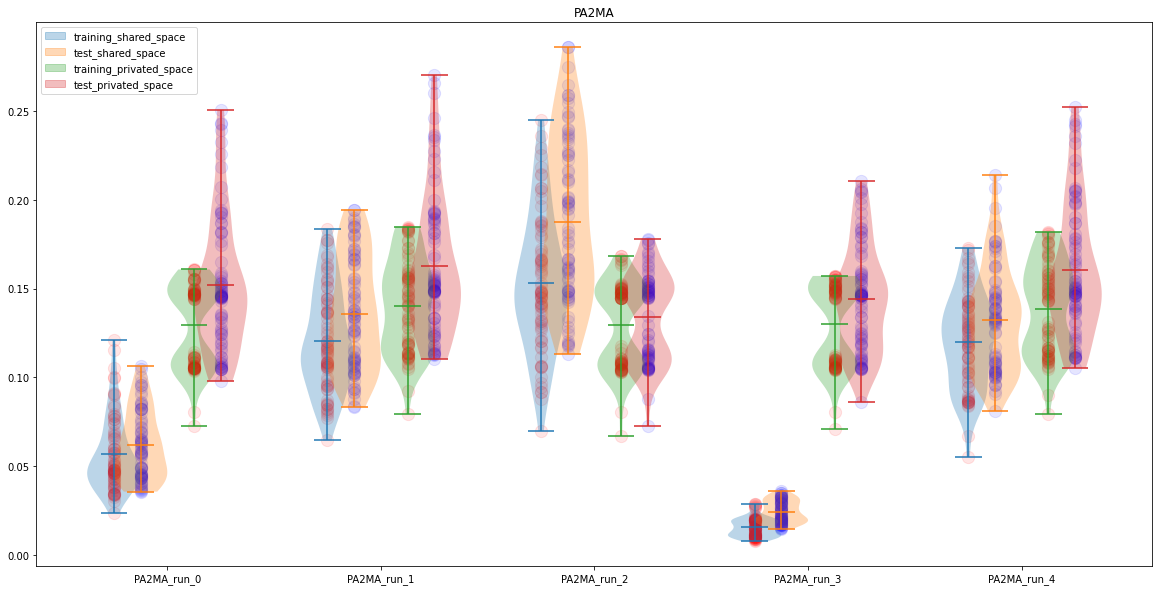

In [45]:
MMD_RF=MMD(kernel=(lambda x,y: guassian_norm_funtion(x,y,sig=250.0)))
dists_ex=[]
dists_sh=[]

dist_dic={
    "Train":{},
    "Test":{}
}
base_model="PA2MA"
for data_subset in ["Test","Train"]:
    #print(data_subset)
    for run in range(0,5):
        
        model='{}_run_{}'.format(base_model,run)
        print('{}_run_{}'.format(base_model,run))
    
        dist_ex=np.array(MMD_RF.compute_batched_distance_from_saved(
        os.path.join(root,"Latent_space",data_subset),'{}_run_{}'.format(base_model,run),'enc_ex','PA','MA',
            sample_strategy='over_sample_smaller',
            n_samples=5)
                      )
        dists_ex.append(dist_ex)
        #print("private done")
        

        dist_sh=np.array(MMD_RF.compute_batched_distance_from_saved(
        os.path.join(root,"Latent_space",data_subset),'{}_run_{}'.format(base_model,run),'enc_sh','PA','MA',
            sample_strategy='over_sample_smaller',
            n_samples=5)
                      )
        dists_sh.append(dist_sh)
        #print("shared done")
        
        dist_dic[data_subset][model]={
        "shared":dists_sh,
        "privated":dists_ex
    }
        dists_ex=[]
        dists_sh=[]
    

print("saving in ",os.path.join(root,"Latent_space",base_model+"_MMD"))
np.save(os.path.join(root,"Latent_space",base_model+"_MMD"),dist_dic)

#plt.violinplot([dist_dic['Train'][k]["shared"][0] for k in dist_dic['Train'].keys()])
plot_distances(dist_dic)

0 PA2MA_run_0
2 PA2MA_run_1
4 PA2MA_run_2
6 PA2MA_run_3
8 PA2MA_run_4


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

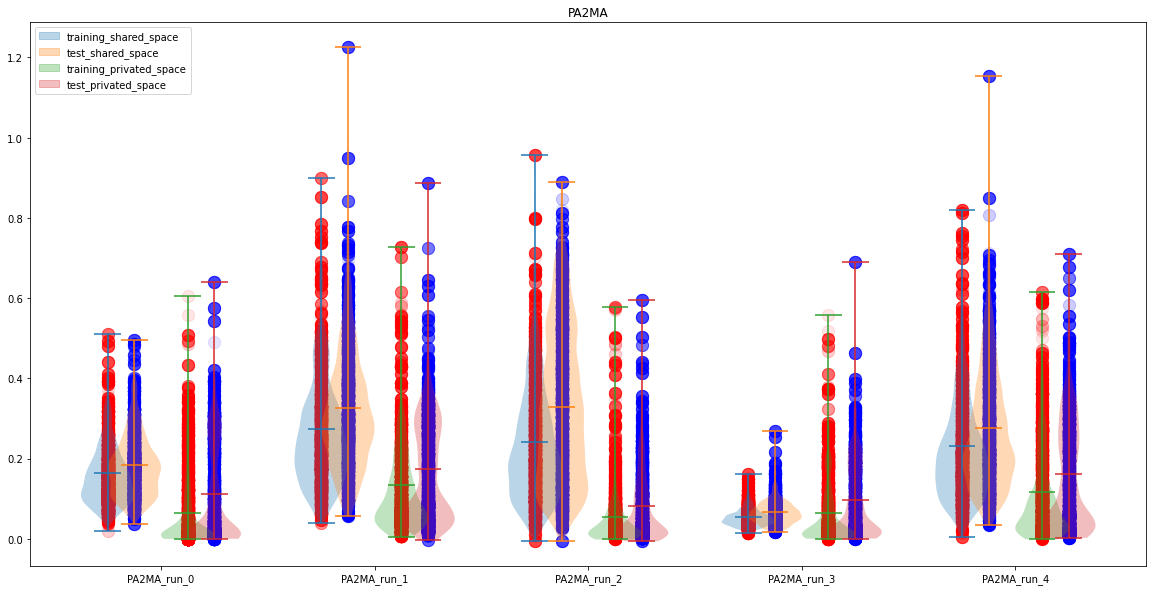

In [15]:
plot_distances(dist_dic)

0 PA2MA_run_0
2 PA2MA_run_1
4 PA2MA_run_2
6 PA2MA_run_3
8 PA2MA_run_4
10 MT2PA_run_0
12 MT2PA_run_1
14 MT2PA_run_2
16 MT2PA_run_3
18 MT2PA_run_4


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

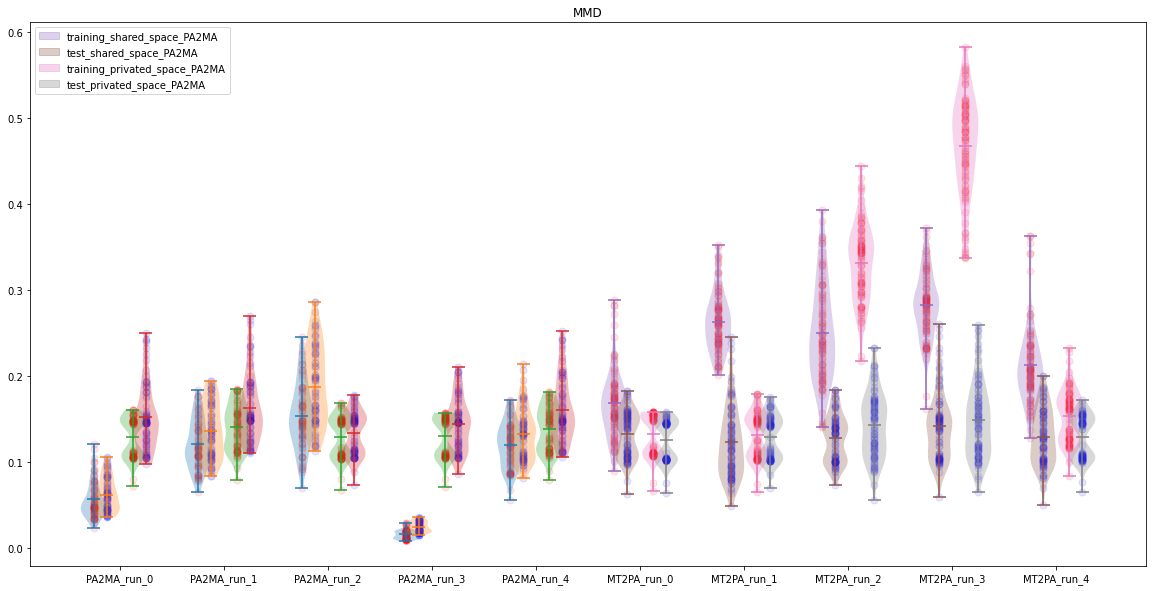

In [46]:
PA2MAD=np.load(os.path.join(root,"Latent_space","PA2MA"+"_MMD.npy"),allow_pickle=True)
MT2PAD=np.load(os.path.join(root,"Latent_space","MT2PA"+"_MMD.npy"),allow_pickle=True)

plot_multiple_models([
    np.load(os.path.join(root,"Latent_space","PA2MA"+"_MMD.npy"),allow_pickle=True).tolist(),
    np.load(os.path.join(root,"Latent_space","MT2PA"+"_MMD.npy"),allow_pickle=True).tolist()
],
    figure=plt.figure(figsize=(20,10)),
    distance_name="MMD")

MT2PA_run_0
MT2PA_run_1
MT2PA_run_2
MT2PA_run_3
MT2PA_run_4
MT2PA_run_0
MT2PA_run_1
MT2PA_run_2
MT2PA_run_3
MT2PA_run_4
0 MT2PA_run_0
2 MT2PA_run_1
4 MT2PA_run_2
6 MT2PA_run_3
8 MT2PA_run_4


['MT2PA_run_0', 'MT2PA_run_1', 'MT2PA_run_2', 'MT2PA_run_3', 'MT2PA_run_4']

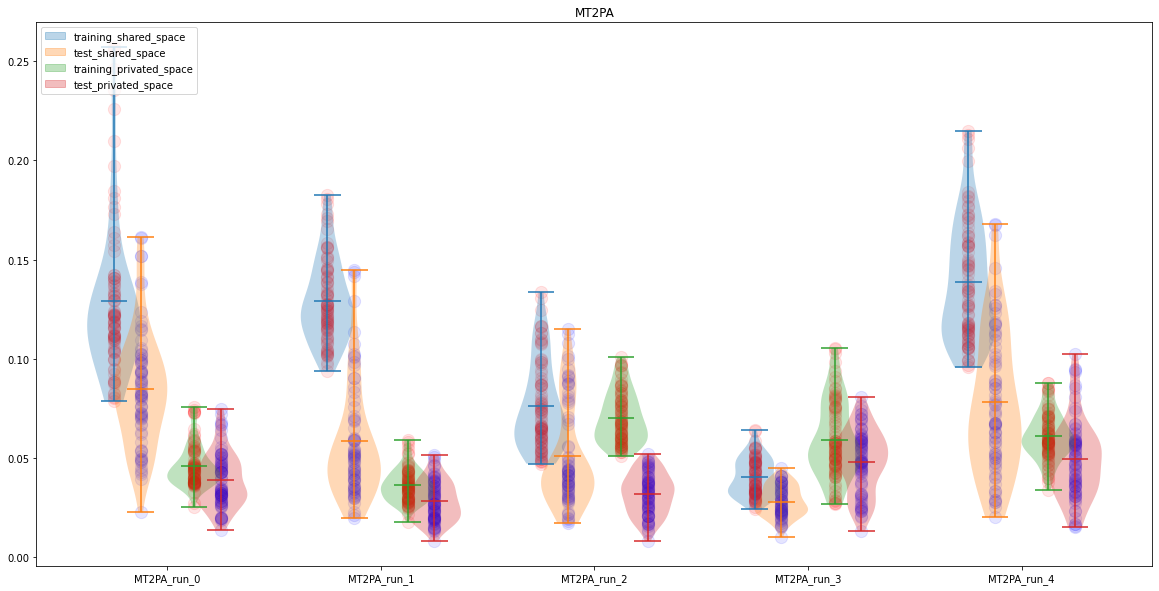

In [3]:
from Distances import MMD,radial_funtion,cosine_similarity
#from glob import glob

MMD_RF=MMD(kernel=cosine_similarity)
dists_ex=[]
dists_sh=[]

dist_dic={
    "Train":{},
    "Test":{}
}
base_model="MT2PA"
for data_subset in ["Test","Train"]:
    #print(data_subset)
    for run in range(0,5):
        
        model='{}_run_{}'.format(base_model,run)
        print('{}_run_{}'.format(base_model,run))
    
        dist_ex=np.array(MMD_RF.compute_batched_distance_from_saved(
        os.path.join(root,"Latent_space",data_subset)
            ,'{}_run_{}'.format(base_model,run),
            'enc_ex','MT','PA',
            sample_strategy='over_sample_smaller',
            n_samples=6
        )
                      )
        dists_ex.append(dist_ex)
        #print("private done")
        

        dist_sh=np.array(MMD_RF.compute_batched_distance_from_saved(
        os.path.join(root,"Latent_space",data_subset),'{}_run_{}'.format(base_model,run),'enc_sh','MT','PA',
            sample_strategy='over_sample_smaller',
            n_samples=6)
                      )
        dists_sh.append(dist_sh)
        #print("shared done")
        
        dist_dic[data_subset][model]={
        "shared":dists_sh,
        "privated":dists_ex
    }
        dists_ex=[]
        dists_sh=[]
    

np.save(os.path.join(root,"Latent_space",model+"_cosine_similarity_MMD"),dist_dic)

#plt.violinplot([dist_dic['Train'][k]["shared"][0] for k in dist_dic['Train'].keys()])
plot_distances(dist_dic)
list(dist_dic["Train"].keys())

PA2MA_run_0
PA2MA_run_1
PA2MA_run_2
PA2MA_run_3
PA2MA_run_4
PA2MA_run_0
PA2MA_run_1
PA2MA_run_2
PA2MA_run_3
PA2MA_run_4
0 PA2MA_run_0
2 PA2MA_run_1
4 PA2MA_run_2
6 PA2MA_run_3
8 PA2MA_run_4


['PA2MA_run_0', 'PA2MA_run_1', 'PA2MA_run_2', 'PA2MA_run_3', 'PA2MA_run_4']

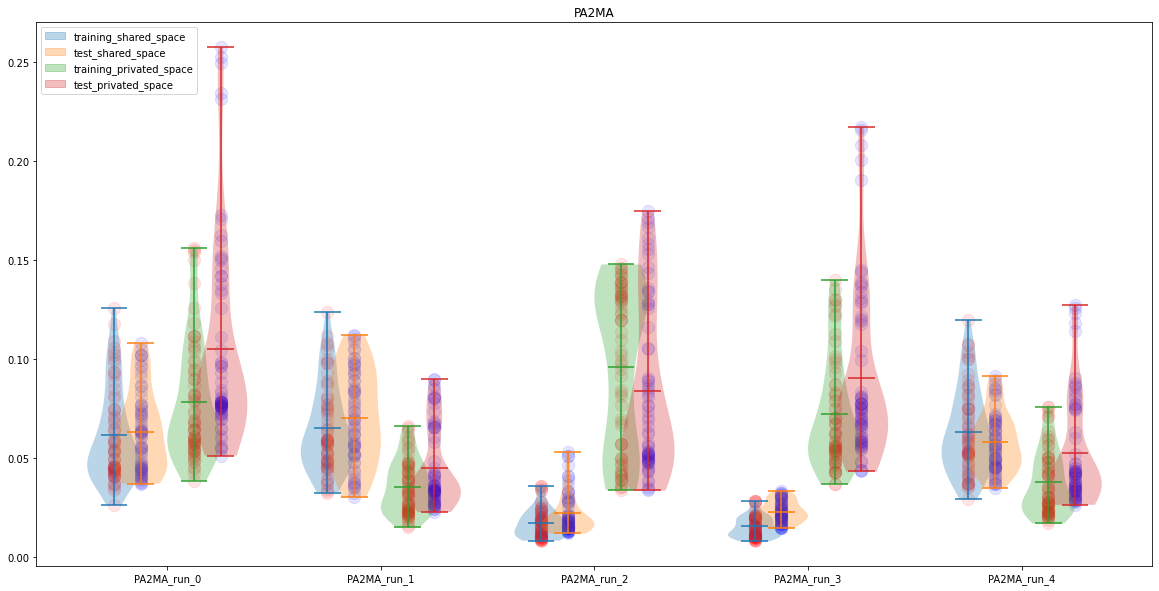

In [4]:
from Distances import MMD,radial_funtion,normalized_guassian_norm_funtion
#from glob import glob

MMD_RF=MMD(kernel=cosine_similarity)
dists_ex=[]
dists_sh=[]

dist_dic={
    "Train":{},
    "Test":{}
}
base_model="PA2MA"
for data_subset in ["Test","Train"]:
    #print(data_subset)
    for run in range(0,5):
        
        model='{}_run_{}'.format(base_model,run)
        print('{}_run_{}'.format(base_model,run))
    
        dist_ex=np.array(MMD_RF.compute_batched_distance_from_saved(
        os.path.join(root,"Latent_space",data_subset)
            ,'{}_run_{}'.format(base_model,run),
            'enc_ex','PA','MA',
            sample_strategy='over_sample_smaller',
            n_samples=6
        )
                      )
        dists_ex.append(dist_ex)
        #print("private done")
        

        dist_sh=np.array(MMD_RF.compute_batched_distance_from_saved(
        os.path.join(root,"Latent_space",data_subset),'{}_run_{}'.format(base_model,run),'enc_sh','PA','MA',
            sample_strategy='over_sample_smaller',
            n_samples=6)
                      )
        dists_sh.append(dist_sh)
        #print("shared done")
        
        dist_dic[data_subset][model]={
        "shared":dists_sh,
        "privated":dists_ex
    }
        dists_ex=[]
        dists_sh=[]
    

np.save(os.path.join(root,"Latent_space",model+"_cosine_similarity_MMD"),dist_dic)

#plt.violinplot([dist_dic['Train'][k]["shared"][0] for k in dist_dic['Train'].keys()])
plot_distances(dist_dic)
list(dist_dic["Train"].keys())

0 PA2MA_run_0
2 PA2MA_run_1
4 PA2MA_run_2
6 PA2MA_run_3
8 PA2MA_run_4
10 MT2PA_run_0
12 MT2PA_run_1
14 MT2PA_run_2
16 MT2PA_run_3
18 MT2PA_run_4


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

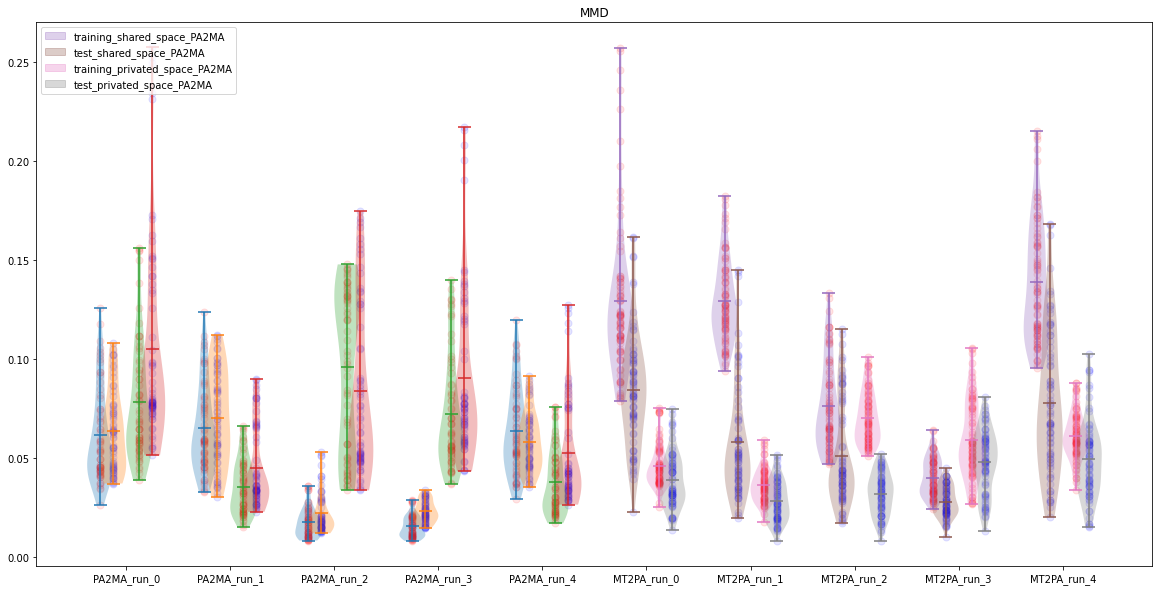

In [6]:
plot_multiple_models([
    np.load(os.path.join(root,"Latent_space","PA2MA_run_4"+"_cosine_similarity_MMD.npy"),allow_pickle=True).tolist(),
    np.load(os.path.join(root,"Latent_space","MT2PA_run_4"+"_cosine_similarity_MMD.npy"),allow_pickle=True).tolist()
],
    figure=plt.figure(figsize=(20,10)),
    distance_name="MMD")

### KL-divergence

### General Normal distribution (reduction to normal distribution over all points)

In [2]:
from Distances import KL_divergence,general_normal_distribution,Univariate_Normal

KLD=KL_divergence(Distribution_embedding=general_normal_distribution ,
              Distance_function=Univariate_Normal
             )

print(np.mean(np.array(KLD.compute_per_sample_distance_from_saved(
    os.path.join(root,"latent_spaces"),'MT2PA_run_3','enc_ex','MT','PA',sample_strategy='over_sample_smaller')
                      )))
print(np.mean(np.array(KLD.compute_per_sample_distance_from_saved(
    os.path.join(root,"latent_spaces"),'MT2PA_run_3','enc_sh','MT','PA',sample_strategy='over_sample_smaller')
                      )))

0.006903447738025398
0.0011000741408782044


Test
MT2PA_run_0
private done
shared done
MT2PA_run_1
private done
shared done
MT2PA_run_2
private done
shared done
MT2PA_run_3
private done
shared done
MT2PA_run_4
private done
shared done
Train
MT2PA_run_0
private done
shared done
MT2PA_run_1
private done
shared done
MT2PA_run_2
private done
shared done
MT2PA_run_3
private done
shared done
MT2PA_run_4
private done
shared done
0 MT2PA_run_0
2 MT2PA_run_1
4 MT2PA_run_2
6 MT2PA_run_3
8 MT2PA_run_4


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

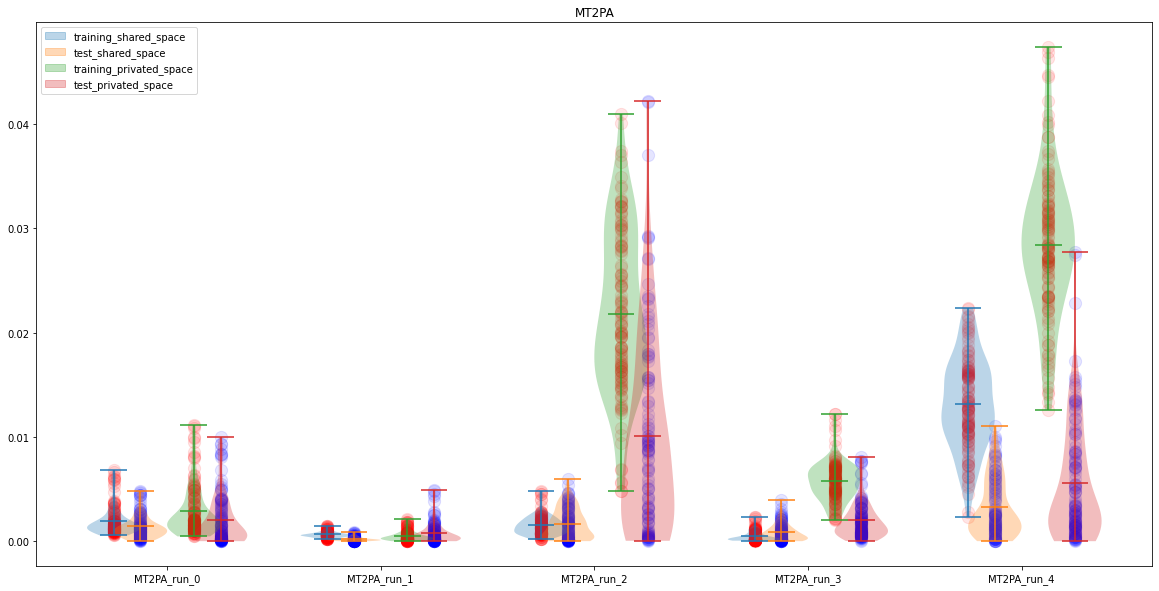

In [7]:
from Distances import KL_divergence,general_normal_distribution,Univariate_Normal
KLD=KL_divergence(Distribution_embedding=general_normal_distribution,
              Distance_function=Univariate_Normal
             )
dists_ex=[]
dists_sh=[]

dist_dic={
    "Train":{},
    "Test":{}
}

base_model="MT2PA"
for data_subset in ["Test","Train"]:
    print(data_subset)
    for run in range(0,5):
        
        model='{}_run_{}'.format(base_model,run)
        print('{}_run_{}'.format(base_model,run))
    
        dist_ex=np.array(KLD.compute_batched_distance_from_saved(
        os.path.join(root,"Latent_space",data_subset),'{}_run_{}'.format(base_model,run),'enc_ex','MT','PA',
            sample_strategy='over_sample_smaller',n_samples=4)
                      )
        dists_ex.append(dist_ex)
        print("private done")
        

        dist_sh=np.array(KLD.compute_batched_distance_from_saved(
        os.path.join(root,"Latent_space",data_subset),'{}_run_{}'.format(base_model,run),'enc_sh','MT','PA',
            sample_strategy='over_sample_smaller',n_samples=4)
                      )
        dists_sh.append(dist_sh)
        print("shared done")
        
        dist_dic[data_subset][model]={
        "shared":dists_sh,
        "privated":dists_ex
    }
        dists_ex=[]
        dists_sh=[]
    

np.save(os.path.join(root,"Latent_space",base_model+"_KLD_general_normal_distribution_reduction"),dist_dic)

#plt.violinplot([dist_dic['Train'][k]["shared"][0] for k in dist_dic['Train'].keys()])
plot_distances(dist_dic)

PA2MA_run_0
PA2MA_run_1
PA2MA_run_2
PA2MA_run_3
PA2MA_run_4
PA2MA_run_0
PA2MA_run_1
PA2MA_run_2
PA2MA_run_3
PA2MA_run_4
0 PA2MA_run_0
2 PA2MA_run_1
4 PA2MA_run_2
6 PA2MA_run_3
8 PA2MA_run_4


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

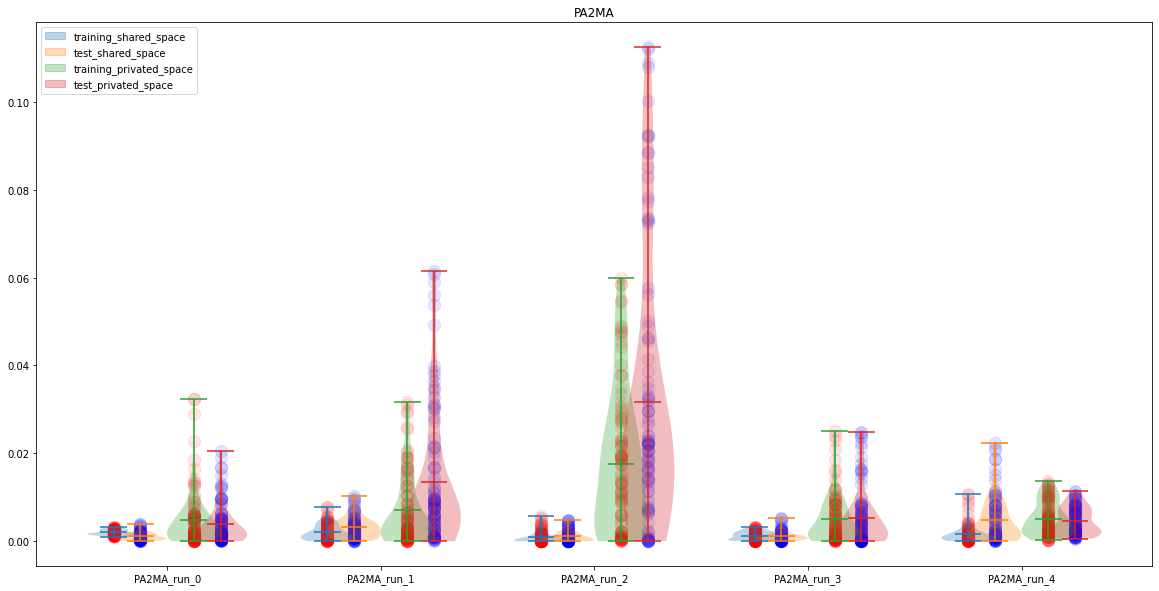

In [10]:
from Distances import KL_divergence,general_normal_distribution,Univariate_Normal
KLD=KL_divergence(Distribution_embedding=general_normal_distribution,
              Distance_function=Univariate_Normal
             )
dists_ex=[]
dists_sh=[]

dist_dic={
    "Train":{},
    "Test":{}
}

base_model="PA2MA"
for data_subset in ["Test","Train"]:
    for run in range(0,5):
        
        model='{}_run_{}'.format(base_model,run)
        print('{}_run_{}'.format(base_model,run))
    
        dist_ex=np.array(KLD.compute_batched_distance_from_saved(
        os.path.join(root,"Latent_space",data_subset),'{}_run_{}'.format(base_model,run),'enc_ex','PA','MA',
            sample_strategy='over_sample_smaller',n_samples=4)
                      )
        dists_ex.append(dist_ex)
        

        dist_sh=np.array(KLD.compute_batched_distance_from_saved(
        os.path.join(root,"Latent_space",data_subset),'{}_run_{}'.format(base_model,run),'enc_sh','PA','MA',
            sample_strategy='over_sample_smaller',n_samples=4)
                      )
        dists_sh.append(dist_sh)
        
        dist_dic[data_subset][model]={
        "shared":dists_sh,
        "privated":dists_ex
    }
        dists_ex=[]
        dists_sh=[]
    

np.save(os.path.join(root,"Latent_space",base_model+"_KLD_general_normal_distribution_reduction"),dist_dic)

#plt.violinplot([dist_dic['Train'][k]["shared"][0] for k in dist_dic['Train'].keys()])
plot_distances(dist_dic)

0 PA2MA_run_0
2 PA2MA_run_1
4 PA2MA_run_2
6 PA2MA_run_3
8 PA2MA_run_4
10 MT2PA_run_0
12 MT2PA_run_1
14 MT2PA_run_2
16 MT2PA_run_3
18 MT2PA_run_4


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

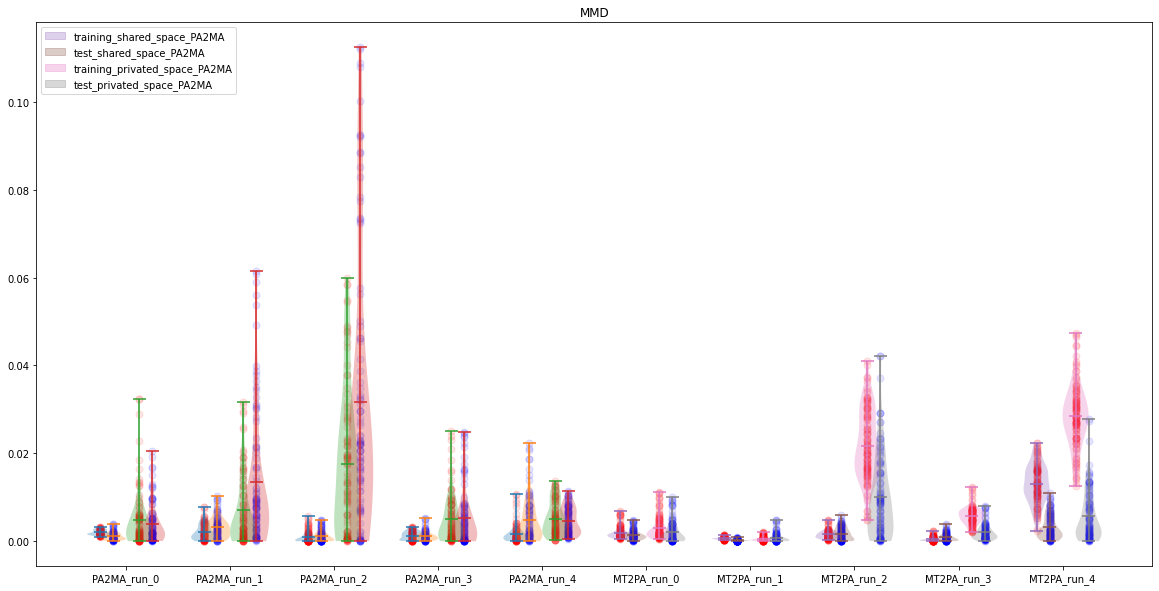

In [11]:
plot_multiple_models([
    np.load(os.path.join(root,"Latent_space","PA2MA"+"_KLD_general_normal_distribution_reduction.npy"),allow_pickle=True).tolist(),
    np.load(os.path.join(root,"Latent_space","MT2PA"+"_KLD_general_normal_distribution_reduction.npy"),allow_pickle=True).tolist()
],
    figure=plt.figure(figsize=(20,10)),
    distance_name="MMD")

### Moment based Normal distribution (reduction image moments per channel)

In [2]:
from Distances import KL_divergence,moment_reduction,Moment_based_Multivariate_Normal,batch_normal_reduction
image_mean_red=(lambda P1: tuple(
    map(lambda img:moment_reduction(img,i=1,j=1),batch_normal_reduction(P1))
))
KLD=KL_divergence(Distribution_embedding=image_mean_red,
              Distance_function=Moment_based_Multivariate_Normal
             )

print(np.mean(np.array(KLD.compute_per_sample_distance_from_saved(
    os.path.join(root,"latent_spaces"),'MT2PA_run_3','enc_ex','MT','PA',sample_strategy='sub_sample_biggest')
                      )))
print(np.mean(np.array(KLD.compute_per_sample_distance_from_saved(
    os.path.join(root,"latent_spaces"),'MT2PA_run_3','enc_sh','MT','PA',sample_strategy='sub_sample_biggest')
                      )))

0.39308858029511445
0.1693135908302241


Test
MT2PA_run_0
MT2PA_run_1
MT2PA_run_2
MT2PA_run_3
MT2PA_run_4
Train
MT2PA_run_0
MT2PA_run_1
MT2PA_run_2
MT2PA_run_3
MT2PA_run_4
0 MT2PA_run_0
2 MT2PA_run_1
4 MT2PA_run_2
6 MT2PA_run_3
8 MT2PA_run_4


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

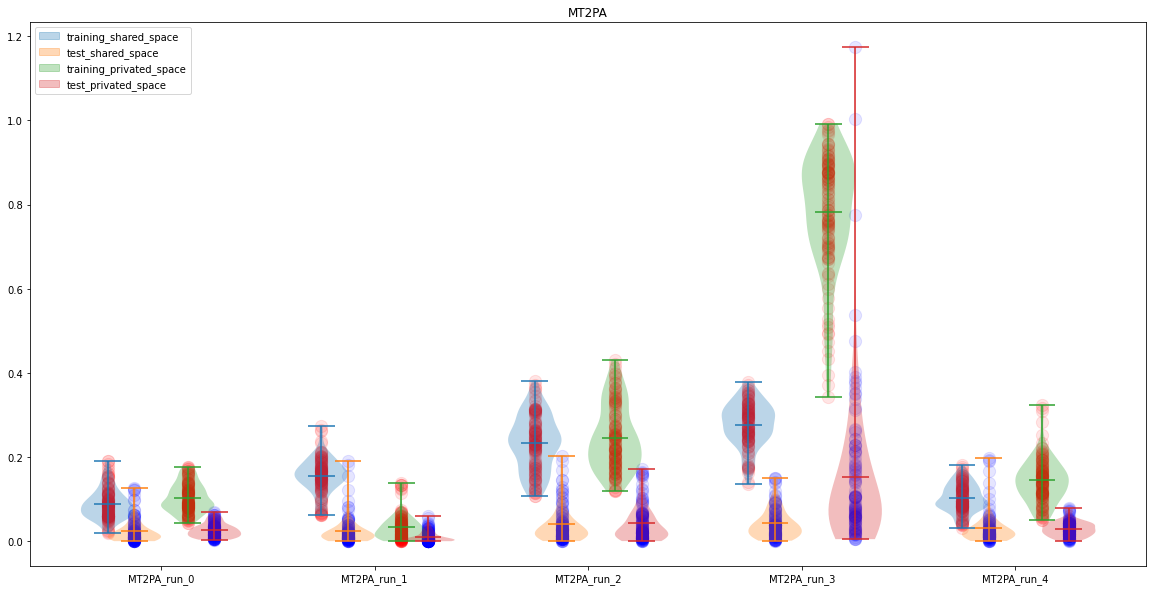

In [12]:
from Distances import KL_divergence,moment_reduction,Moment_based_Multivariate_Normal,batch_normal_reduction
image_mean_red=(lambda P1: tuple(
    map(lambda img:moment_reduction(img,i=1,j=1),batch_normal_reduction(P1))
))
KLD=KL_divergence(Distribution_embedding=image_mean_red,
              Distance_function=Moment_based_Multivariate_Normal
             )

dists_ex=[]
dists_sh=[]

dist_dic={
    "Train":{},
    "Test":{}
}

base_model="MT2PA"
for data_subset in ["Test","Train"]:
    print(data_subset)
    for run in range(0,5):
        
        model='{}_run_{}'.format(base_model,run)
        print('{}_run_{}'.format(base_model,run))
    
        dist_ex=np.array(KLD.compute_batched_distance_from_saved(
        os.path.join(root,"Latent_space",data_subset),'{}_run_{}'.format(base_model,run),'enc_ex','MT','PA',
            sample_strategy='over_sample_smaller',n_samples=4)
                      )
        dists_ex.append(dist_ex)

        dist_sh=np.array(KLD.compute_batched_distance_from_saved(
        os.path.join(root,"Latent_space",data_subset),'{}_run_{}'.format(base_model,run),'enc_sh','MT','PA',
            sample_strategy='over_sample_smaller',n_samples=4)
                      )
        dists_sh.append(dist_sh)
        
        dist_dic[data_subset][model]={
        "shared":dists_sh,
        "privated":dists_ex
    }
        dists_ex=[]
        dists_sh=[]
    

np.save(os.path.join(root,"Latent_space",base_model+"_KLD_general_moment_11_based_reduction"),dist_dic)

#plt.violinplot([dist_dic['Train'][k]["shared"][0] for k in dist_dic['Train'].keys()])
plot_distances(dist_dic)

Test
PA2MA_run_0
PA2MA_run_1
PA2MA_run_2
PA2MA_run_3
PA2MA_run_4
Train
PA2MA_run_0
PA2MA_run_1
PA2MA_run_2
PA2MA_run_3
PA2MA_run_4
0 PA2MA_run_0
2 PA2MA_run_1
4 PA2MA_run_2
6 PA2MA_run_3
8 PA2MA_run_4


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

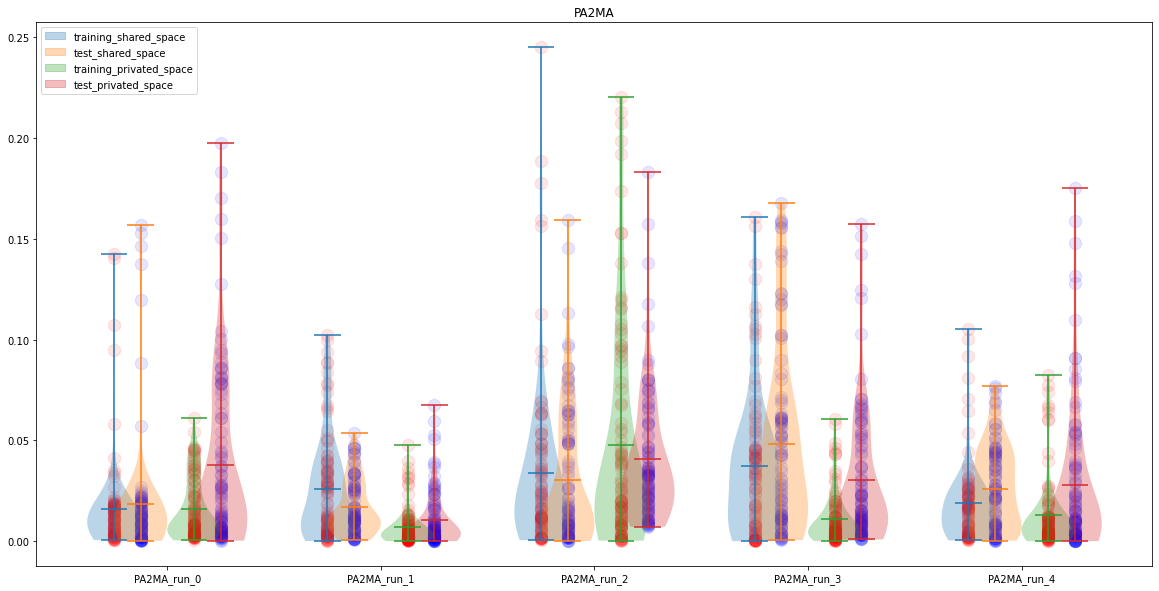

In [13]:
from Distances import KL_divergence,moment_reduction,Moment_based_Multivariate_Normal,batch_normal_reduction
image_mean_red=(lambda P1: tuple(
    map(lambda img:moment_reduction(img,i=1,j=1),batch_normal_reduction(P1))
))
KLD=KL_divergence(Distribution_embedding=image_mean_red,
              Distance_function=Moment_based_Multivariate_Normal
             )

dists_ex=[]
dists_sh=[]

dist_dic={
    "Train":{},
    "Test":{}
}

base_model="PA2MA"
for data_subset in ["Test","Train"]:
    print(data_subset)
    for run in range(0,5):
        
        model='{}_run_{}'.format(base_model,run)
        print('{}_run_{}'.format(base_model,run))
    
        dist_ex=np.array(KLD.compute_batched_distance_from_saved(
        os.path.join(root,"Latent_space",data_subset),'{}_run_{}'.format(base_model,run),'enc_ex','PA','MA',
            sample_strategy='over_sample_smaller',n_samples=4)
                      )
        dists_ex.append(dist_ex)
        
        dist_sh=np.array(KLD.compute_batched_distance_from_saved(
        os.path.join(root,"Latent_space",data_subset),'{}_run_{}'.format(base_model,run),'enc_sh','PA','MA',
            sample_strategy='over_sample_smaller',n_samples=4)
                      )
        dists_sh.append(dist_sh)
        
        dist_dic[data_subset][model]={
        "shared":dists_sh,
        "privated":dists_ex
    }
        dists_ex=[]
        dists_sh=[]
    

np.save(os.path.join(root,"Latent_space",base_model+"_KLD_general_moment_11_based_reduction"),dist_dic)

#plt.violinplot([dist_dic['Train'][k]["shared"][0] for k in dist_dic['Train'].keys()])
plot_distances(dist_dic)

0 PA2MA_run_0
2 PA2MA_run_1
4 PA2MA_run_2
6 PA2MA_run_3
8 PA2MA_run_4
10 MT2PA_run_0
12 MT2PA_run_1
14 MT2PA_run_2
16 MT2PA_run_3
18 MT2PA_run_4


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

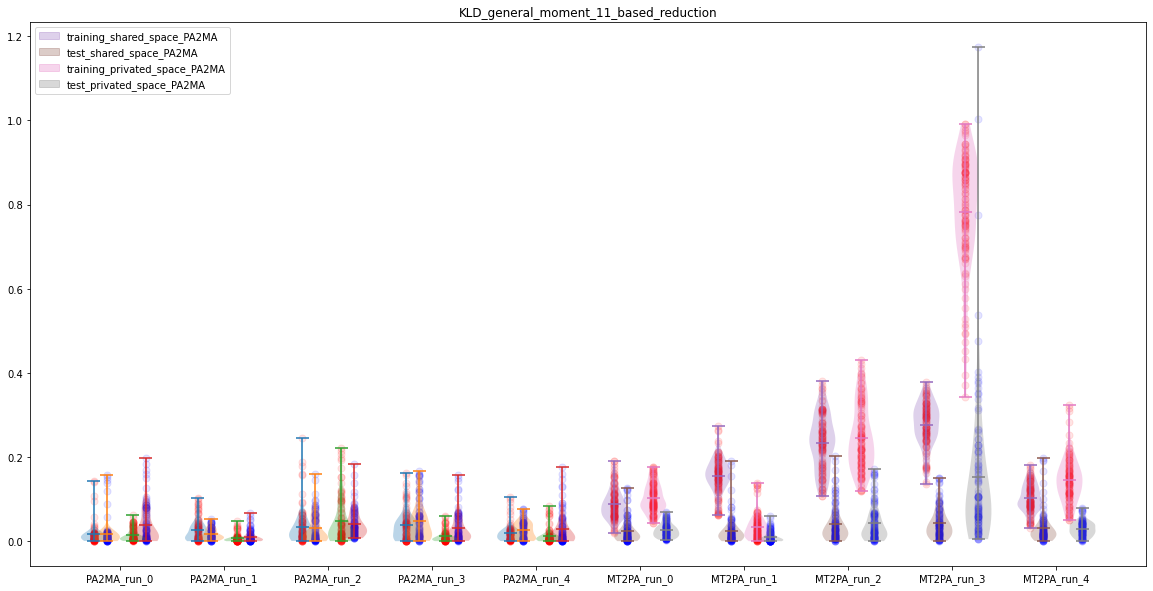

In [15]:
plot_multiple_models([
    np.load(os.path.join(root,"Latent_space","PA2MA"+"_KLD_general_moment_11_based_reduction.npy"),allow_pickle=True).tolist(),
    np.load(os.path.join(root,"Latent_space","MT2PA"+"_KLD_general_moment_11_based_reduction.npy"),allow_pickle=True).tolist()
],
    figure=plt.figure(figsize=(20,10)),
    distance_name="KLD_general_moment_11_based_reduction")

Test
MT2PA_run_0
MT2PA_run_1
MT2PA_run_2
MT2PA_run_3
MT2PA_run_4
Train
MT2PA_run_0
MT2PA_run_1
MT2PA_run_2
MT2PA_run_3
MT2PA_run_4
0 MT2PA_run_0
2 MT2PA_run_1
4 MT2PA_run_2
6 MT2PA_run_3
8 MT2PA_run_4


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

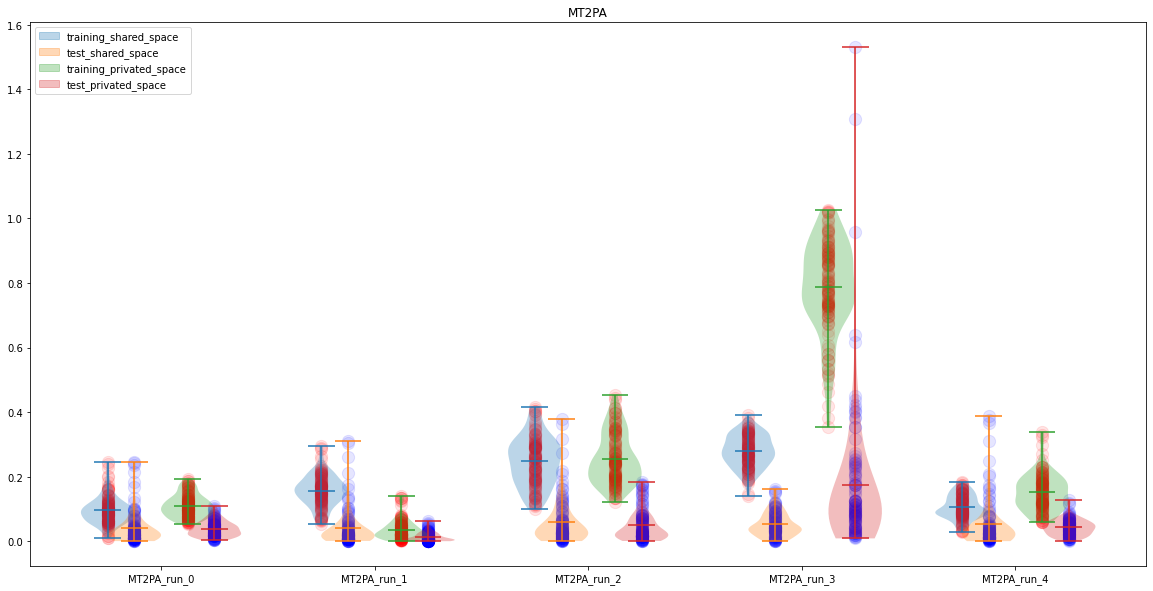

In [17]:
from Distances import KL_divergence,moment_reduction,Moment_based_Multivariate_Normal,batch_normal_reduction
image_mean_red=(lambda P1: tuple(
    map(lambda img:moment_reduction(img,i=2,j=2),batch_normal_reduction(P1))
))
KLD=KL_divergence(Distribution_embedding=image_mean_red,
              Distance_function=Moment_based_Multivariate_Normal
             )

dists_ex=[]
dists_sh=[]

dist_dic={
    "Train":{},
    "Test":{}
}

base_model="MT2PA"
for data_subset in ["Test","Train"]:
    print(data_subset)
    for run in range(0,5):
        
        model='{}_run_{}'.format(base_model,run)
        print('{}_run_{}'.format(base_model,run))
    
        dist_ex=np.array(KLD.compute_batched_distance_from_saved(
        os.path.join(root,"Latent_space",data_subset),'{}_run_{}'.format(base_model,run),'enc_ex','MT','PA',
            sample_strategy='over_sample_smaller',n_samples=4)
                      )
        dists_ex.append(dist_ex)

        dist_sh=np.array(KLD.compute_batched_distance_from_saved(
        os.path.join(root,"Latent_space",data_subset),'{}_run_{}'.format(base_model,run),'enc_sh','MT','PA',
            sample_strategy='over_sample_smaller',n_samples=4)
                      )
        dists_sh.append(dist_sh)
        
        dist_dic[data_subset][model]={
        "shared":dists_sh,
        "privated":dists_ex
    }
        dists_ex=[]
        dists_sh=[]
    

np.save(os.path.join(root,"Latent_space",base_model+"_KLD_general_moment_22_based_reduction"),dist_dic)

#plt.violinplot([dist_dic['Train'][k]["shared"][0] for k in dist_dic['Train'].keys()])
plot_distances(dist_dic)

Test
PA2MA_run_0
PA2MA_run_1
PA2MA_run_2
PA2MA_run_3
PA2MA_run_4
Train
PA2MA_run_0
PA2MA_run_1
PA2MA_run_2
PA2MA_run_3
PA2MA_run_4
0 PA2MA_run_0
2 PA2MA_run_1
4 PA2MA_run_2
6 PA2MA_run_3
8 PA2MA_run_4


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

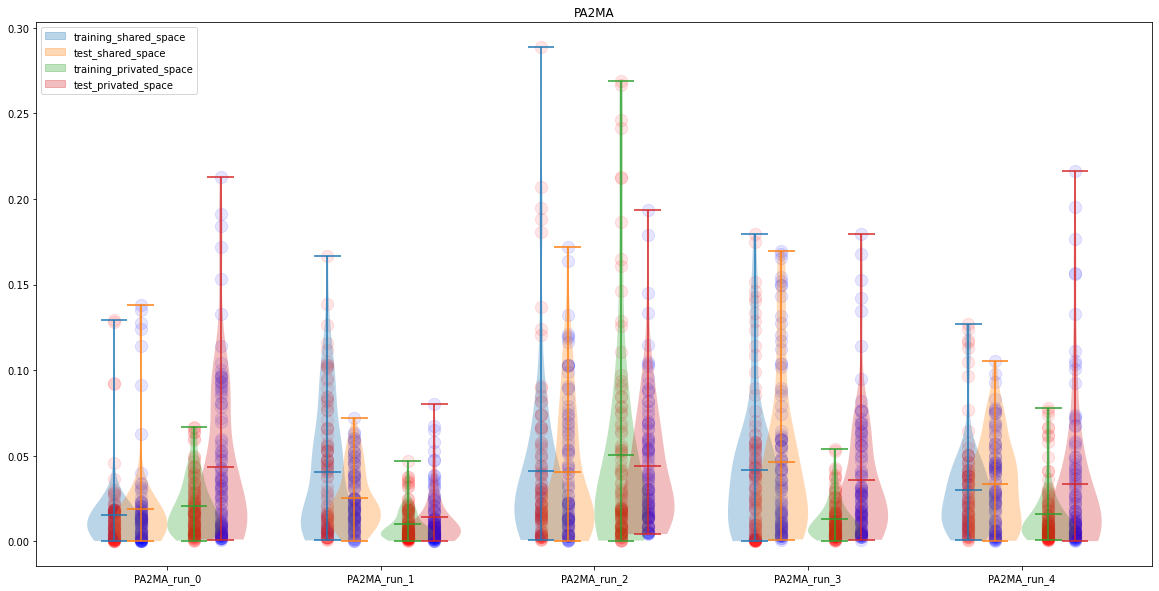

In [19]:
from Distances import KL_divergence,moment_reduction,Moment_based_Multivariate_Normal,batch_normal_reduction
image_mean_red=(lambda P1: tuple(
    map(lambda img:moment_reduction(img,i=2,j=2),batch_normal_reduction(P1))
))
KLD=KL_divergence(Distribution_embedding=image_mean_red,
              Distance_function=Moment_based_Multivariate_Normal
             )

dists_ex=[]
dists_sh=[]

dist_dic={
    "Train":{},
    "Test":{}
}

base_model="PA2MA"
for data_subset in ["Test","Train"]:
    print(data_subset)
    for run in range(0,5):
        
        model='{}_run_{}'.format(base_model,run)
        print('{}_run_{}'.format(base_model,run))
    
        dist_ex=np.array(KLD.compute_batched_distance_from_saved(
        os.path.join(root,"Latent_space",data_subset),'{}_run_{}'.format(base_model,run),'enc_ex','PA','MA',
            sample_strategy='over_sample_smaller',n_samples=4)
                      )
        dists_ex.append(dist_ex)
        
        dist_sh=np.array(KLD.compute_batched_distance_from_saved(
        os.path.join(root,"Latent_space",data_subset),'{}_run_{}'.format(base_model,run),'enc_sh','PA','MA',
            sample_strategy='over_sample_smaller',n_samples=4)
                      )
        dists_sh.append(dist_sh)
        
        dist_dic[data_subset][model]={
        "shared":dists_sh,
        "privated":dists_ex
    }
        dists_ex=[]
        dists_sh=[]
    

np.save(os.path.join(root,"Latent_space",base_model+"_KLD_general_moment_22_based_reduction"),dist_dic)

#plt.violinplot([dist_dic['Train'][k]["shared"][0] for k in dist_dic['Train'].keys()])
plot_distances(dist_dic)

0 PA2MA_run_0
2 PA2MA_run_1
4 PA2MA_run_2
6 PA2MA_run_3
8 PA2MA_run_4
10 MT2PA_run_0
12 MT2PA_run_1
14 MT2PA_run_2
16 MT2PA_run_3
18 MT2PA_run_4


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

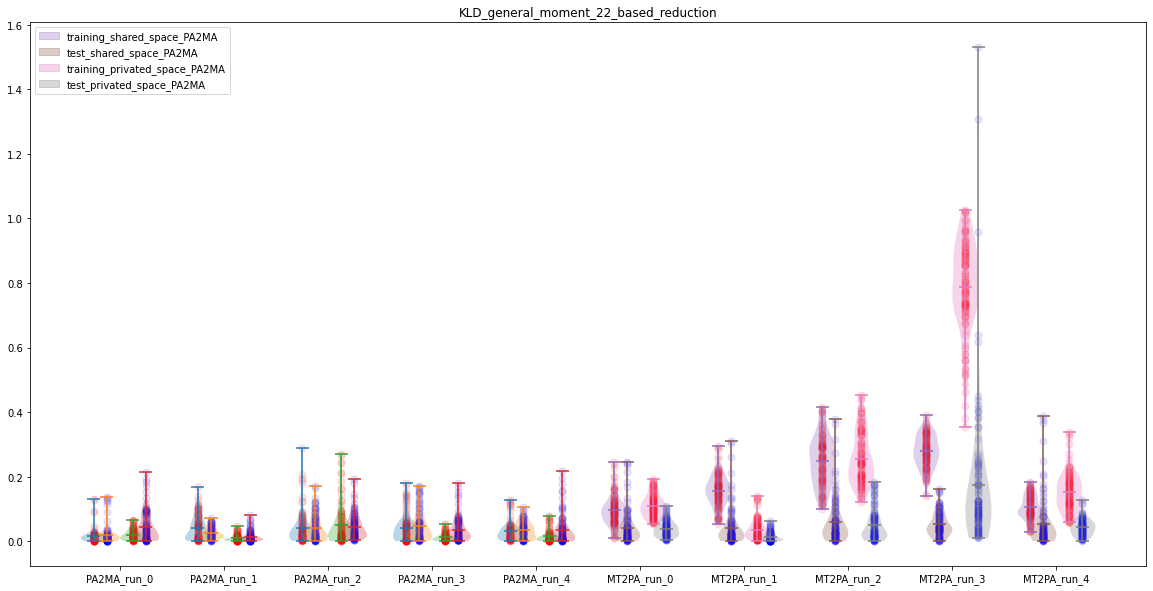

In [27]:
plot_multiple_models([
    np.load(os.path.join(root,"Latent_space","PA2MA"+"_KLD_general_moment_22_based_reduction.npy"),allow_pickle=True).tolist(),
    np.load(os.path.join(root,"Latent_space","MT2PA"+"_KLD_general_moment_22_based_reduction.npy"),allow_pickle=True).tolist()
],
    figure=plt.figure(figsize=(20,10)),
    distance_name="KLD_general_moment_22_based_reduction")

Test
MT2PA_run_0
MT2PA_run_1
MT2PA_run_2
MT2PA_run_3
MT2PA_run_4
Train
MT2PA_run_0
MT2PA_run_1
MT2PA_run_2
MT2PA_run_3
MT2PA_run_4
0 MT2PA_run_0
2 MT2PA_run_1
4 MT2PA_run_2
6 MT2PA_run_3
8 MT2PA_run_4


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

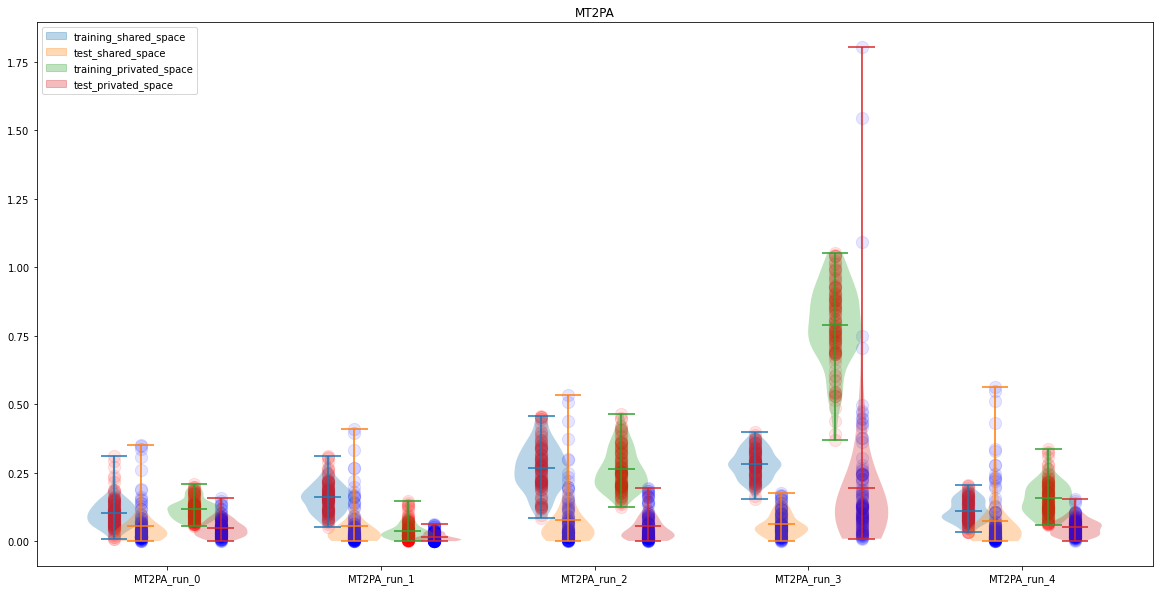

In [30]:
from Distances import KL_divergence,moment_reduction,Moment_based_Multivariate_Normal,batch_normal_reduction
image_mean_red=(lambda P1: tuple(
    map(lambda img:moment_reduction(img,i=3,j=3),batch_normal_reduction(P1))
))
KLD=KL_divergence(Distribution_embedding=image_mean_red,
              Distance_function=Moment_based_Multivariate_Normal
             )

dists_ex=[]
dists_sh=[]

dist_dic={
    "Train":{},
    "Test":{}
}

base_model="MT2PA"
for data_subset in ["Test","Train"]:
    print(data_subset)
    for run in range(0,5):
        
        model='{}_run_{}'.format(base_model,run)
        print('{}_run_{}'.format(base_model,run))
    
        dist_ex=np.array(KLD.compute_batched_distance_from_saved(
        os.path.join(root,"Latent_space",data_subset),'{}_run_{}'.format(base_model,run),'enc_ex','MT','PA',
            sample_strategy='over_sample_smaller',n_samples=4)
                      )
        dists_ex.append(dist_ex)
        

        dist_sh=np.array(KLD.compute_batched_distance_from_saved(
        os.path.join(root,"Latent_space",data_subset),'{}_run_{}'.format(base_model,run),'enc_sh','MT','PA',
            sample_strategy='over_sample_smaller',n_samples=4)
                      )
        dists_sh.append(dist_sh)
        
        dist_dic[data_subset][model]={
        "shared":dists_sh,
        "privated":dists_ex
    }
        dists_ex=[]
        dists_sh=[]
    

np.save(os.path.join(root,"Latent_space",base_model+"_KLD_general_moment_33_based_reduction"),dist_dic)

#plt.violinplot([dist_dic['Train'][k]["shared"][0] for k in dist_dic['Train'].keys()])
plot_distances(dist_dic)

Test
PA2MA_run_0
private done
shared done
PA2MA_run_1
private done
shared done
PA2MA_run_2
private done
shared done
PA2MA_run_3
private done
shared done
PA2MA_run_4
private done
shared done
Train
PA2MA_run_0
private done
shared done
PA2MA_run_1
private done
shared done
PA2MA_run_2
private done
shared done
PA2MA_run_3
private done
shared done
PA2MA_run_4
private done
shared done
0 PA2MA_run_0
2 PA2MA_run_1
4 PA2MA_run_2
6 PA2MA_run_3
8 PA2MA_run_4


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

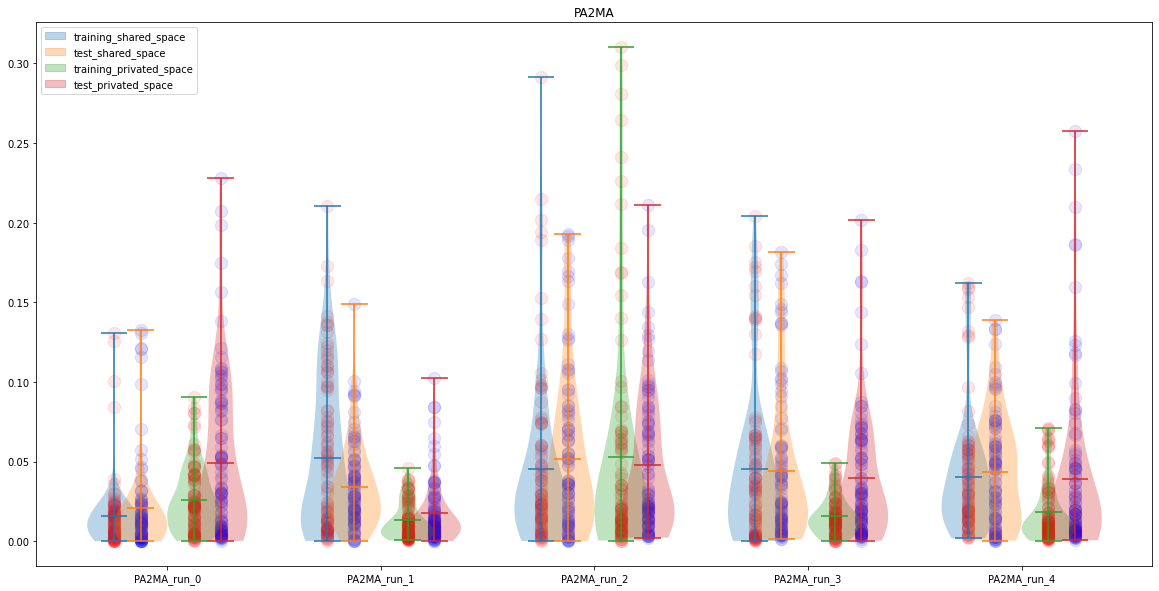

In [31]:
from Distances import KL_divergence,moment_reduction,Moment_based_Multivariate_Normal,batch_normal_reduction
image_mean_red=(lambda P1: tuple(
    map(lambda img:moment_reduction(img,i=3,j=3),batch_normal_reduction(P1))
))
KLD=KL_divergence(Distribution_embedding=image_mean_red,
              Distance_function=Moment_based_Multivariate_Normal
             )

dists_ex=[]
dists_sh=[]

dist_dic={
    "Train":{},
    "Test":{}
}

base_model="PA2MA"
for data_subset in ["Test","Train"]:
    print(data_subset)
    for run in range(0,5):
        
        model='{}_run_{}'.format(base_model,run)
        print('{}_run_{}'.format(base_model,run))
    
        dist_ex=np.array(KLD.compute_batched_distance_from_saved(
        os.path.join(root,"Latent_space",data_subset),'{}_run_{}'.format(base_model,run),'enc_ex','PA','MA',
            sample_strategy='over_sample_smaller',n_samples=4)
                      )
        dists_ex.append(dist_ex)
        print("private done")
        

        dist_sh=np.array(KLD.compute_batched_distance_from_saved(
        os.path.join(root,"Latent_space",data_subset),'{}_run_{}'.format(base_model,run),'enc_sh','PA','MA',
            sample_strategy='over_sample_smaller',n_samples=4)
                      )
        dists_sh.append(dist_sh)
        print("shared done")
        
        dist_dic[data_subset][model]={
        "shared":dists_sh,
        "privated":dists_ex
    }
        dists_ex=[]
        dists_sh=[]
    

np.save(os.path.join(root,"Latent_space",base_model+"_KLD_general_moment_33_based_reduction"),dist_dic)

#plt.violinplot([dist_dic['Train'][k]["shared"][0] for k in dist_dic['Train'].keys()])
plot_distances(dist_dic)

0 PA2MA_run_0
2 PA2MA_run_1
4 PA2MA_run_2
6 PA2MA_run_3
8 PA2MA_run_4
10 MT2PA_run_0
12 MT2PA_run_1
14 MT2PA_run_2
16 MT2PA_run_3
18 MT2PA_run_4


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

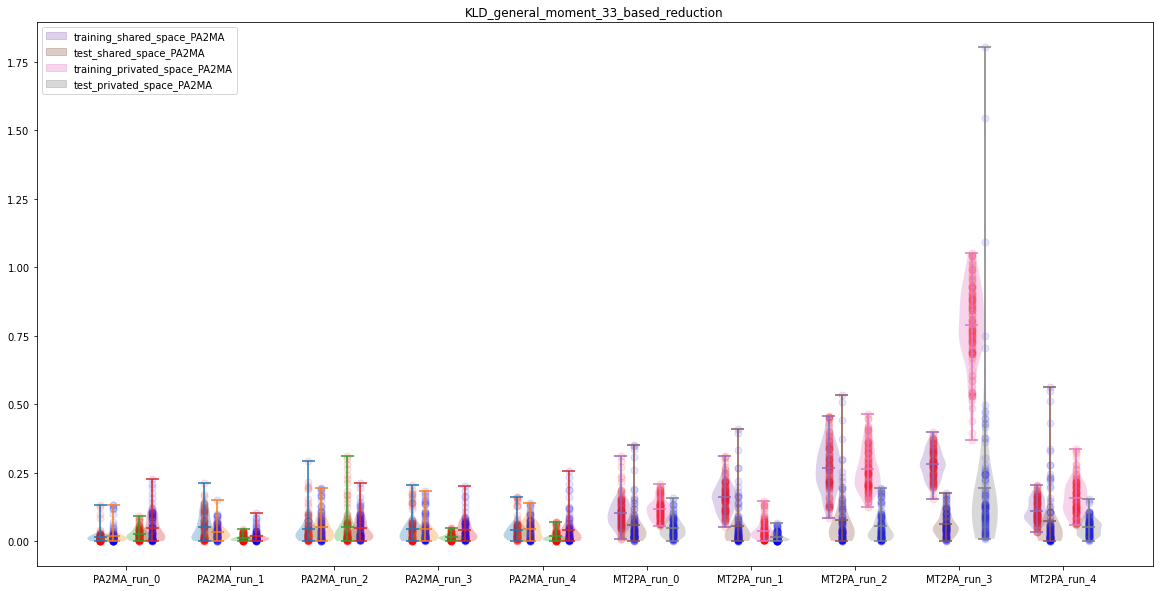

In [32]:
plot_multiple_models([
    np.load(os.path.join(root,"Latent_space","PA2MA"+"_KLD_general_moment_33_based_reduction.npy"),allow_pickle=True).tolist(),
    np.load(os.path.join(root,"Latent_space","MT2PA"+"_KLD_general_moment_33_based_reduction.npy"),allow_pickle=True).tolist()
],
    figure=plt.figure(figsize=(20,10)),
    distance_name="KLD_general_moment_33_based_reduction")

### Multinomial distribution (histogram based) KLD

MT2PA_run_0
MT2PA_run_1
MT2PA_run_2
MT2PA_run_3
MT2PA_run_4
MT2PA_run_0
MT2PA_run_1
MT2PA_run_2
MT2PA_run_3
MT2PA_run_4
0 MT2PA_run_0
2 MT2PA_run_1
4 MT2PA_run_2
6 MT2PA_run_3
8 MT2PA_run_4


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

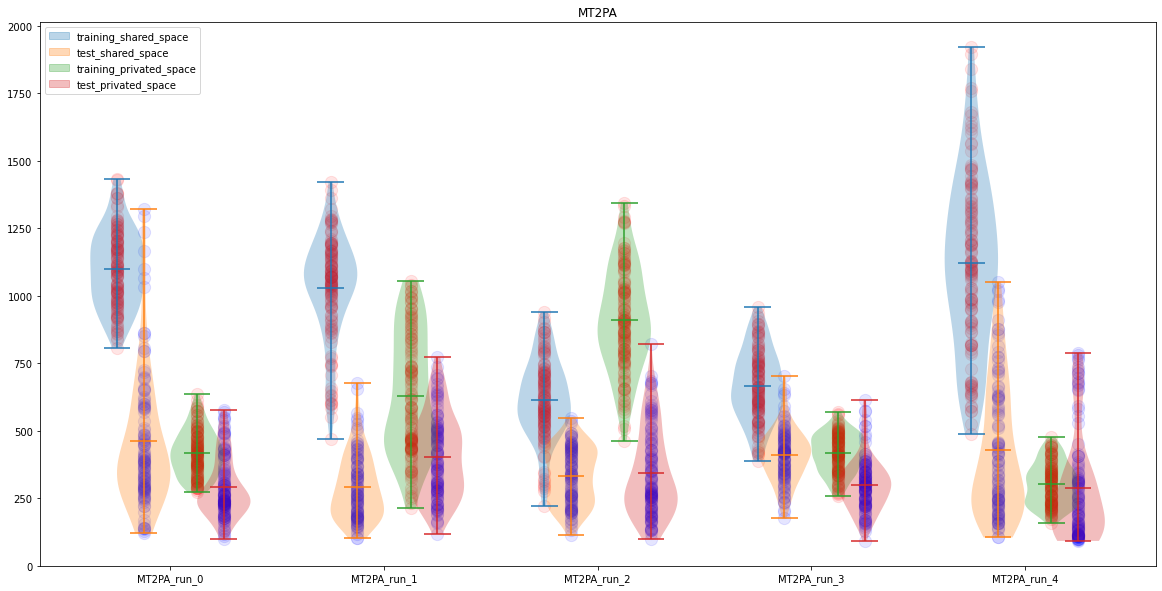

In [34]:
from Distances import KL_divergence,multinomial_dist,Entropy_of_Multinomial_gaussians,batch_normal_reduction,Entropy_of_Multinomial_gaussians_naive
KLD=KL_divergence(Distribution_embedding=multinomial_dist,
              Distance_function=Entropy_of_Multinomial_gaussians_naive
             )

dists_ex=[]
dists_sh=[]

dist_dic={
    "Train":{},
    "Test":{}
}

base_model="MT2PA"
for data_subset in ["Test","Train"]:
    #print(data_subset)
    for run in range(0,5):
        
        model='{}_run_{}'.format(base_model,run)
        print('{}_run_{}'.format(base_model,run))
    
        dist_ex=np.array(KLD.compute_batched_distance_from_saved(
        os.path.join(root,"Latent_space",data_subset),'{}_run_{}'.format(base_model,run),'enc_ex','MT','PA',
            sample_strategy='over_sample_smaller',n_samples=4)
                      )
        dists_ex.append(dist_ex)
        #print("private done")
        

        dist_sh=np.array(KLD.compute_batched_distance_from_saved(
        os.path.join(root,"Latent_space",data_subset),'{}_run_{}'.format(base_model,run),'enc_sh','MT','PA',
            sample_strategy='over_sample_smaller',n_samples=4)
                      )
        dists_sh.append(dist_sh)
        #print("shared done")
        
        dist_dic[data_subset][model]={
        "shared":dists_sh,
        "privated":dists_ex
    }
        dists_ex=[]
        dists_sh=[]
    

np.save(os.path.join(root,"Latent_space",base_model+"_KLD_multinomial"),dist_dic)

#plt.violinplot([dist_dic['Train'][k]["shared"][0] for k in dist_dic['Train'].keys()])
plot_distances(dist_dic)

Test
PA2MA_run_0
private done
shared done
PA2MA_run_1
private done
shared done
PA2MA_run_2
private done
shared done
PA2MA_run_3
private done
shared done
PA2MA_run_4
private done
shared done
Train
PA2MA_run_0
private done
shared done
PA2MA_run_1
private done
shared done
PA2MA_run_2
private done
shared done
PA2MA_run_3
private done
shared done
PA2MA_run_4
private done
shared done
0 PA2MA_run_0
2 PA2MA_run_1
4 PA2MA_run_2
6 PA2MA_run_3
8 PA2MA_run_4


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

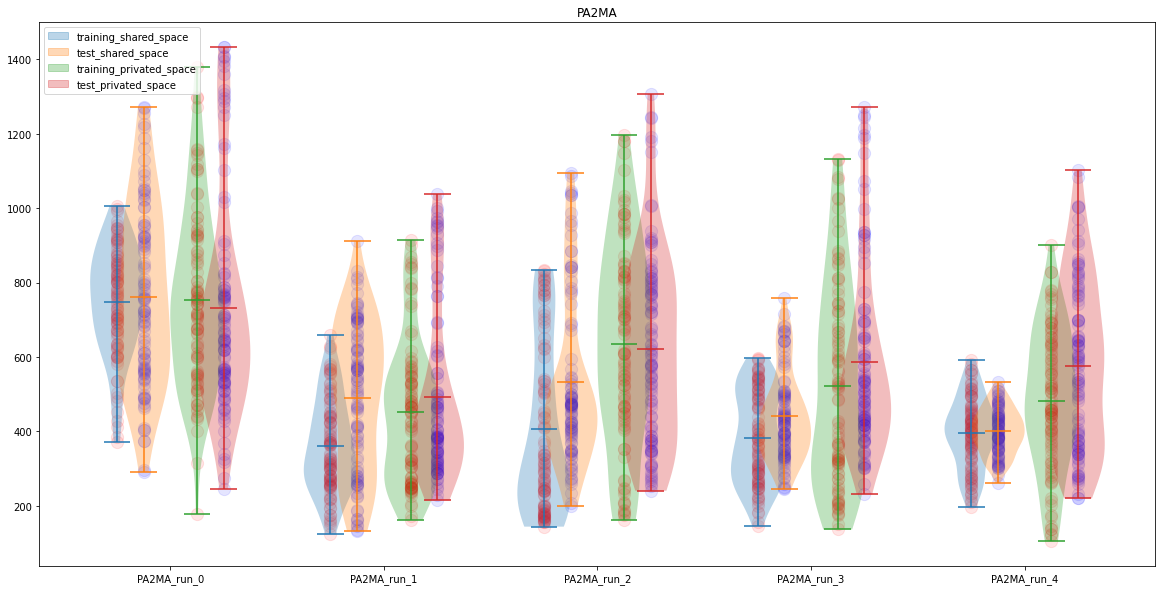

In [35]:
from Distances import KL_divergence,multinomial_dist,Entropy_of_Multinomial_gaussians,batch_normal_reduction,Entropy_of_Multinomial_gaussians_naive
KLD=KL_divergence(Distribution_embedding=multinomial_dist,
              Distance_function=Entropy_of_Multinomial_gaussians_naive
             )

dists_ex=[]
dists_sh=[]

dist_dic={
    "Train":{},
    "Test":{}
}

base_model="PA2MA"
for data_subset in ["Test","Train"]:
    print(data_subset)
    for run in range(0,5):
        
        model='{}_run_{}'.format(base_model,run)
        print('{}_run_{}'.format(base_model,run))
    
        dist_ex=np.array(KLD.compute_batched_distance_from_saved(
        os.path.join(root,"Latent_space",data_subset),'{}_run_{}'.format(base_model,run),'enc_ex','PA','MA',
            sample_strategy='over_sample_smaller',n_samples=4)
                      )
        dists_ex.append(dist_ex)
        print("private done")
        

        dist_sh=np.array(KLD.compute_batched_distance_from_saved(
        os.path.join(root,"Latent_space",data_subset),'{}_run_{}'.format(base_model,run),'enc_sh','PA','MA',
            sample_strategy='over_sample_smaller',n_samples=4)
                      )
        dists_sh.append(dist_sh)
        print("shared done")
        
        dist_dic[data_subset][model]={
        "shared":dists_sh,
        "privated":dists_ex
    }
        dists_ex=[]
        dists_sh=[]
    

np.save(os.path.join(root,"Latent_space",base_model+"_KLD_multinomial"),dist_dic)

#plt.violinplot([dist_dic['Train'][k]["shared"][0] for k in dist_dic['Train'].keys()])
plot_distances(dist_dic)

0 PA2MA_run_0
2 PA2MA_run_1
4 PA2MA_run_2
6 PA2MA_run_3
8 PA2MA_run_4
10 MT2PA_run_0
12 MT2PA_run_1
14 MT2PA_run_2
16 MT2PA_run_3
18 MT2PA_run_4


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

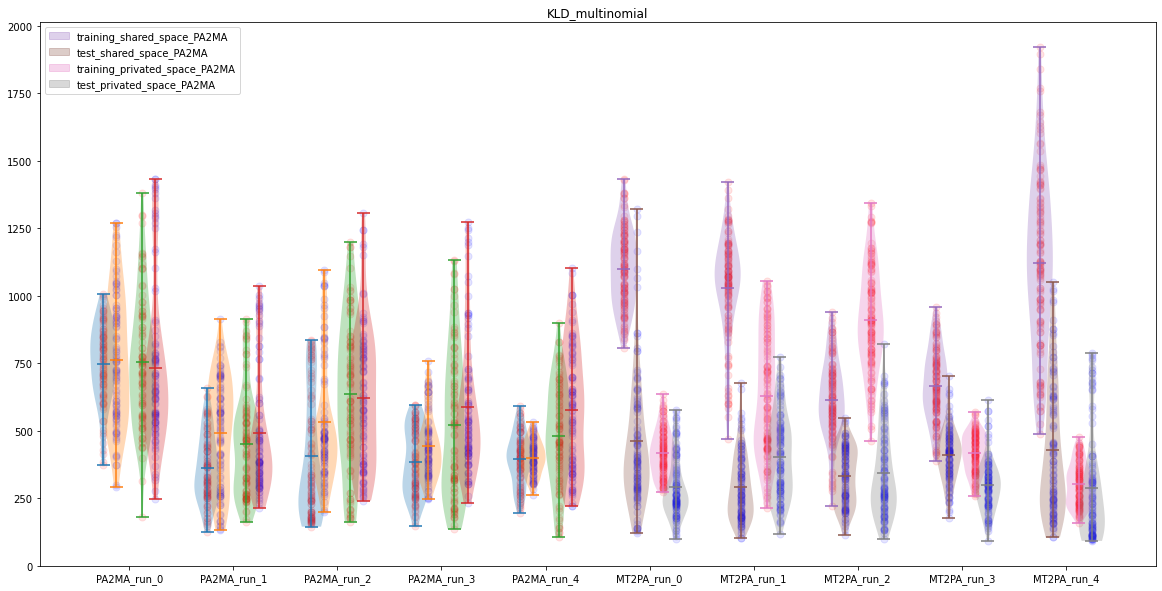

In [37]:
plot_multiple_models([
    np.load(os.path.join(root,"Latent_space","PA2MA"+"_KLD_multinomial.npy"),allow_pickle=True).tolist(),
    np.load(os.path.join(root,"Latent_space","MT2PA"+"_KLD_multinomial.npy"),allow_pickle=True).tolist()
],
    figure=plt.figure(figsize=(20,10)),
    distance_name="KLD_multinomial")

### Jensen-Shanon Divergence


Validation
MT2PA_run_0
private done
shared done
MT2PA_run_1
private done
shared done
MT2PA_run_2
private done
shared done
MT2PA_run_3
private done
shared done
MT2PA_run_4
private done
shared done
Train
MT2PA_run_0
private done
shared done
MT2PA_run_1
private done
shared done
MT2PA_run_2
private done
shared done
MT2PA_run_3
private done
shared done
MT2PA_run_4
private done
shared done
0 MT2PA_run_0
2 MT2PA_run_1
4 MT2PA_run_2
6 MT2PA_run_3
8 MT2PA_run_4


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

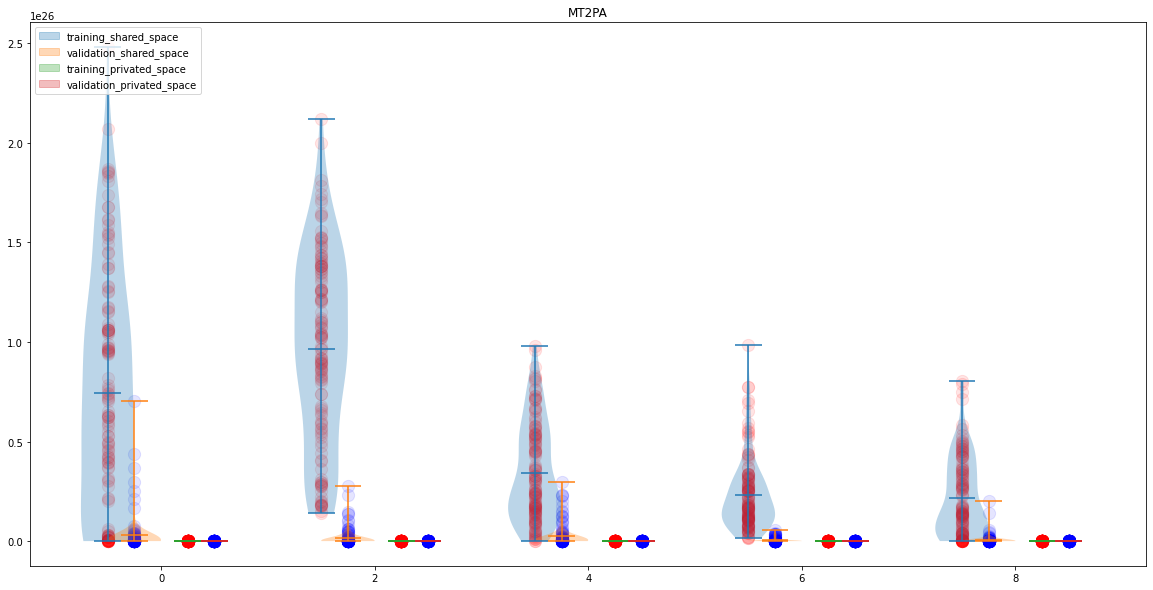

In [19]:
from Distances import Jensen_Shanon_divergence,general_normal_distribution,Univariate_Normal,median_gaussian
JSD=Jensen_Shanon_divergence(
    Distribution_embedding=general_normal_distribution,
    Distance_function=Univariate_Normal,
    Mixture_distribution_method=median_gaussian
)

dists_ex=[]
dists_sh=[]

dist_dic={
    "Train":{},
    "Test":{}
}

base_model="MT2PA"
for data_subset in ["Test","Train"]:
    print(data_subset)
    for run in range(0,5):
        
        model='{}_run_{}'.format(base_model,run)
        print('{}_run_{}'.format(base_model,run))
    
        dist_ex=np.array(JSD.compute_batched_distance_from_saved(
        os.path.join(root,"Latent_space",data_subset),'{}_run_{}'.format(base_model,run),'enc_ex','MT','PA',
            sample_strategy='over_sample_smaller',n_samples=4)
                      )
        dists_ex.append(dist_ex)
        print("private done")
        

        dist_sh=np.array(KLD.compute_batched_distance_from_saved(
        os.path.join(root,"Latent_space",data_subset),'{}_run_{}'.format(base_model,run),'enc_sh','MT','PA',
            sample_strategy='over_sample_smaller',n_samples=4)
                      )
        dists_sh.append(dist_sh)
        print("shared done")
        
        dist_dic[data_subset][model]={
        "shared":dists_sh,
        "privated":dists_ex
    }
        dists_ex=[]
        dists_sh=[]
    

np.save(os.path.join(root,"Latent_space",base_model+"_MMD"),dist_dic)

#plt.violinplot([dist_dic['Train'][k]["shared"][0] for k in dist_dic['Train'].keys()])
plot_distances(dist_dic)

In [ ]:
from Distances import KL_divergence,moment_reduction,Moment_based_Multivariate_Normal,batch_normal_reduction
image_mean_red=(lambda P1: tuple(
    map(lambda img:moment_reduction(img,i=2,j=2),batch_normal_reduction(P1))
))
KLD=KL_divergence(Distribution_embedding=image_mean_red,
              Distance_function=Moment_based_Multivariate_Normal
             )

print(np.mean(np.array(KLD.compute_per_sample_distance_from_saved(
    os.path.join(root,"latent_spaces"),'MT2PA_run_3','enc_ex','MT','PA',sample_strategy='over_sample_smaller')
                      )))
print(np.mean(np.array(KLD.compute_per_sample_distance_from_saved(
    os.path.join(root,"latent_spaces"),'MT2PA_run_3','enc_sh','MT','PA',sample_strategy='over_sample_smaller')
                      )))

### Contrastive Divergence

In [ ]:
from Distances import Contrastive_Divergence
import gc
domain="MT2PA"
version="run_0"
component="enc_sh"
model=load_model(domain="MT2PA",version="run_0",component="enc_sh",root="/tf/Data-Guillermo")

CD=Contrastive_Divergence(
    Model=model
)

root="/tf/Data-Guillermo"
dataset_1='Para'
dataset_2='Mato Grosso'
X_1 = np.load(
    glob.glob(os.path.join(root,dataset_1,'*_1C_RGB_img_filt_norm_2020_2021_10B-001.npy'))[0] ,
    mmap_mode='r')

mask_1 = np.load(
    glob.glob(os.path.join(root,dataset_1,'test_mask_*.npy'))[0] ,
    mmap_mode='r')

X_1,mask_1,data_1=get_box_coords(X_1,mask_1,128,dat_set=0)

X_2 = np.load(
    glob.glob(os.path.join(root,dataset_2,'*_1C_RGB_img_filt_norm_2020_2021_10B-001.npy'))[0] ,
    mmap_mode='r')

mask_2 = np.load(
    glob.glob(os.path.join(root,dataset_2,'test_mask_*.npy'))[0] ,
    mmap_mode='r')

X_2,mask_2,data_2=get_box_coords(X_2,mask_2,128,dat_set=0)

batch_size=1
CD_dists=[]
for b in range(len(data_1)//5):
#for b in range(2):
    b_1=data_1[b:b+batch_size]
    b_2=data_2[b:b+batch_size]
    x_1=np.array(list(map(lambda c:X_1[c[0]:c[1],c[2]:c[3]],b_1)))
    x_2=np.array(list(map(lambda c:X_2[c[0]:c[1],c[2]:c[3]],b_2)))
    #z_sh_b=model.predict(x_b)
    
    cds=CD.compute(x_1,x_2)
    print()
    CD_dists.append(cds)
    gc.collect()
np.mean(np.array(CD_dists))

/usr/local/lib/python3.6/dist-packages/keras/models.py:251: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '
